# Eploratory Data Analysis




### Beforehand, I should apologize. My code is ugly. I know and I am already taking care of my python skills. 
### But it works.
### In the future I will probably fix it (all pep 8 included)
###  

## Lets clean a little more (while explorating a little)

In [1]:
#Next step after cleaning data is to READ THE DATA, study it, scrutinize it with the purpose of understanding what it can say and offer
#This step is the EXPLORATORY Data Analysis

#So, studying the cleaned data we can see that there are more things to clean. In some columns we can identify word that repeat more often than others and many others patterns.


#In this case, Ken Jee identified and treated some things that are titled as a subtitle and cleared

In [2]:
#ENTER###############################################################################################################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#ENTER###############################################################################################################################
df=pd.read_csv("./KenJee_salary_data_cleaned.csv")

In [4]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [5]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'sql_yn', 'sas_yn', 'd3js_yn', 'julia_yn',
       'jupyter_yn', 'keras_yn', 'matlab_yn', 'matplotlib_yn', 'pytorch_yn',
       'scikit_yn', 'tensor_yn', 'weka_yn', 'selenium_yn', 'hadoop_yn',
       'tableau_yn', 'bi_yn', 'bigml_yn', 'rapidminer_yn', 'flink_yn',
       'datarobot_yn', 'hana_yn', 'mongo_yn', 'trifacta_yn', 'minitab_yn',
       'kafka_yn', 'microstrategy_yn', 'google_an_yn', 'spss_yn'],
      dtype='object')

## Job title and seniority  (Ken Jee idea but greatly improved)

### Analyzing Job titles:

In [6]:
#ENTER###############################################################################################################################
#: there are words that are reapeted more often than others.

#If we search for more extended types of data scientist, we will find just 5 or 6 (as Ken Jee done).
# def title_simplifier(title):
#     if 'data scientist' in title.lower():
#         return 'data scientist'
#     elif 'data engineer' in title.lower():
#         return 'data engineer'
#     elif 'analyst' in title.lower():
#         return 'analyst'
#     elif 'machine learning' in title.lower():
#         return 'machine learning'
#     elif 'manager' in title.lower():
#         return 'manager'
#     elif 'director' in title.lower():
#         return 'director'
#     else:
#         return 'na'
    
#but, If we read data we have got here we can find many more data related job positions. ALERT! doing this we can make a wrong 
#play, taking into account that we can be overfittint our model to the data we have, it could be better apreciated if we compare
#our results in this data with the results with the testing data or unseen data. If the results with other data is much more 
#different one of the reasons could be this overfitting
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'scientist' in title.lower():
        return 'other scientist'
    elif 'data modeler' in title.lower():
        return 'data modeler'
    elif 'data' and 'anal' in title.lower():
        return 'data analitics'
    else:
        return 'na'  #not applicable
    
    
#FLAG: OVERFITTING???

In [7]:
#ENTER###############################################################################################################################
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist               313
other scientist              143
data engineer                119
analyst                      101
machine learning engineer     22
manager                       16
na                            10
data analitics                 8
data modeler                   5
director                       5
Name: job_simp, dtype: int64

In [8]:
    #This cell is made to check those job_titles that are not contemplated in the "title_simplication" function clasification:
        #I made a list with just the data that is categorized as "na" (not applicable) in "simp_job" column and analyze it.
        #Finaly, I modified the "title_simplification" funtion if convenient.
job_title_variation=df.apply(lambda x: x['Job Title'] if x['job_simp']=="na" else 1,axis=1)
job_title_variation.value_counts()

1                                                     732
Software Engineer - Data Visualization                  3
Enterprise Architect, Data                              2
Technology-Minded, Data Professional Opportunities      2
Data Management Specialist                              1
Data Operations Lead                                    1
Senior Engineer, Data Management Engineering            1
dtype: int64

### Analysing seniority:

In [9]:
#ENTER###############################################################################################################################
#This function looks for the seniority asked in the title of each job asking (Job Title column)
def seniority(title):
    if 's.sr' in title.lower() or 's. sr' in title.lower() or 's sr' in title.lower() or 'ssr' in title.lower() or 's. senior' in title.lower() or 'semi or' in title.lower() or 'middle' in title.lower() or 'mid' in title.lower():
        return 'ssr'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    else:
        return 'na'
df['seniority_by_title'] = df['Job Title'].apply(seniority)
df.seniority_by_title.value_counts()

na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

In [11]:
    #This cell is made to check those job_titles that are not contemplated in the "seniority" function clasification:
        #I made a list with just the data that is categorized as "na" (not applicable) in "seniority" column and analyze it.
        #Finaly, I modified the "seniority" funtion if convenient.
senior=df.apply(lambda x: x['Job Title'] if x['seniority_by_title']=="na" else 1,axis=1)
senior.value_counts()

1                                         223
Data Scientist                            131
Data Engineer                              53
Data Analyst                               15
Marketing Data Analyst                      6
                                         ... 
Customer Data Scientist/Sales Engineer      1
Data Scientist - Bioinformatics             1
Data Analyst - Asset Management             1
Data Engineer 4 - Contract                  1
Machine Learning Engineer (NLP)             1
Length: 180, dtype: int64

In [12]:
#ENTER###############################################################################################################################
#This function looks for the seniority asked in the description of each job asking (Job Description column)
import re
        

def experience (job_description):

    if 'years experience' in job_description.lower(): #find each position in 'Job Description' thas says "years experience" (years experience)
        text_list = job_description.split('years experience')
        text_list = [x[-15:] for x in text_list] #Just take last 15 characters before the searched string (where the text says how many years)
        
        if len(text_list)>1: #the next line only is executed if there is more than one item in the list
            text_list = text_list[:-1] #delete last item in list (couse it does not contain a number)
        
        # Here I transform words to numbers
        for index, item in enumerate(text_list):
            if "one" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('one','1')
            if "two" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('two','2')
            if "three" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('three','3')
            if "four" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('four','4')
            if "five" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('five','5')
            if "six" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('six','6')
            if "seven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('seven','7')
            if "eight" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eight','8')
            if "nine" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('nine','9')
            if "ten" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('ten','10')
            if "eleven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eleven','11')
            if "twelve" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('twelve','12')

        # Here numbers are everthing left. (thanks stackoverflow)
        pattern = re.compile(r'\d+')
        num_list = [" ".join(pattern.findall(item)) for item in text_list] #Take each number and create a list of numbers.
        #NOTE: when there are decimals numbers, they are taked as different numbers (i.e. 3.5 are taked as 3 and 5). But, taking into acount that the average between this and it correct value not affect much, it is irrelevant to correct it.

        num_list = max(num_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)
                
        text = ' '.join(num_list)
        #I choose to do it like this because if I join number I can't differenciate a decimal to decide which is larger('10 3' -> 103)
        last_list = text.split(' ')
        text = max(last_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)
             
        if text == '': #Writes 'na' when text is empty (because in the text before de searched string there is no numbers)
            text = 'na'
            
        return text
    
    elif 'years of' in job_description.lower(): #find each position in 'Job Description' thas says "years of" (years of experience)
        text_list = job_description.split('years of')
        text_list = [x[-15:] for x in text_list] #Just take last 15 characters before the searched string (where the text says how many years)
        
        if len(text_list)>1: #the next line only is executed if there is more than one item in the list
            text_list = text_list[:-1] #delete last item in list (couse it does not contain a number)
        
        # Here I transform words to numbers
        for index, item in enumerate(text_list):
            if "one" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('one','1')
            if "two" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('two','2')
            if "three" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('three','3')
            if "four" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('four','4')
            if "five" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('five','5')
            if "six" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('six','6')
            if "seven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('seven','7')
            if "eight" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eight','8')
            if "nine" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('nine','9')
            if "ten" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('ten','10')
            if "eleven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eleven','11')
            if "twelve" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('twelve','12')

        # Here numbers are everthing left. (thanks stackoverflow)
        pattern = re.compile(r'\d+')
        num_list = [" ".join(pattern.findall(item)) for item in text_list] #Take each number and create a list of numbers.
        #NOTE: when there are decimals numbers, they are taked as different numbers (i.e. 3.5 are taked as 3 and 5). But, taking into acount that the average between this and it correct value not affect much, it is irrelevant to correct it.

        num_list = max(num_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)
                
        text = ' '.join(num_list)
        #I choose to do it like this because if I join number I can't differenciate a decimal to decide which is larger('10 3' -> 103)
        last_list = text.split(' ')
        text = max(last_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)
    
        if text == '': #Writes 'na' when text is empty (because in the text before de searched string there is no numbers)
            text = 'na'    
    
        return text
    
    elif 'years’' in job_description.lower(): #find each position in 'Job Description' thas says "years’" (year's experience)
        text_list = job_description.split('years’')
        text_list = [x[-15:] for x in text_list] #Just take last 15 characters before the searched string (where the text says how many years)
        
        if len(text_list)>1: #the next line only is executed if there is more than one item in the list
            text_list = text_list[:-1] #delete last item in list (couse it does not contain a number)
        
        # Here I transform words to numbers
        for index, item in enumerate(text_list):
            if "one" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('one','1')
            if "two" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('two','2')
            if "three" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('three','3')
            if "four" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('four','4')
            if "five" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('five','5')
            if "six" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('six','6')
            if "seven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('seven','7')
            if "eight" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eight','8')
            if "nine" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('nine','9')
            if "ten" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('ten','10')
            if "eleven" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('eleven','11')
            if "twelve" in text_list[index].lower():
                text_list[index] = text_list[index].lower().replace('twelve','12')

        # Here numbers are everthing left. (thanks stackoverflow)
        pattern = re.compile(r'\d+')
        num_list = [" ".join(pattern.findall(item)) for item in text_list] #Take each number and create a list of numbers.
        #NOTE: when there are decimals numbers, they are taked as different numbers (i.e. 3.5 are taked as 3 and 5). But, taking into acount that the average between this and it correct value not affect much, it is irrelevant to correct it.

        num_list = max(num_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)
                
        text = ' '.join(num_list)
        #I choose to do it like this because if I join number I can't differenciate a decimal to decide which is larger('10 3' -> 103)
        last_list = text.split(' ')
        text = max(last_list)   #finally we take the bigger number
        #(this means that if the compay ask for 2 years of experience with python and 5 years with ML, the important number is the 5)

        if text == '': #Writes 'na' when text is empty (because in the text before de searched string there is no numbers)
            text = 'na'
        
        return text
   
    else:
        return 'na'
    
    
df['seniority_by_description'] = df['Job Description'].apply(experience)

df['seniority_by_description'].value_counts()


na    294
5     138
2     102
3      90
7      36
4      29
8      26
1      14
6      11
9       2
Name: seniority_by_description, dtype: int64

In [13]:
#ENTER###############################################################################################################################
#Here I turn years of experience asked to seniority classification:
    #characterizing seniority by: https://devetry.com/blog/junior-vs-mid-vs-senior-software-engineers-–-experience-skills-expectations/
    
def years_2_seniority(years_c):
    if years_c.lower().isdigit():
        if int(years_c.lower()) <= 2:
            return 'jr'
        elif int(years_c.lower()) > 2 and int(years_c.lower()) <= 5:
            return 'ssr'
        elif int(years_c.lower()) > 5:
            return 'sr'
    else:
        return 'na'    
    
df['seniority_by_description'] = df['seniority_by_description'].apply(years_2_seniority)
df['seniority_by_description'].value_counts()

na     294
ssr    257
jr     116
sr      75
Name: seniority_by_description, dtype: int64

In [14]:
#ENTER###############################################################################################################################
#Finally I made de last seniorities characterization ranking by seniority_by_title and then seniority_by_description
df['seniority'] = df.apply(lambda x: x['seniority_by_description'] if 'na' in x['seniority_by_title'] else x['seniority_by_title'],axis=1)
df['seniority'].value_counts()

#job_title_variation=df.apply(lambda x: x['Job Title'] if x['job_simp']=="na" else 1,axis=1)

sr     258
na     214
ssr    179
jr      91
Name: seniority, dtype: int64

## Checking job_state column  (Ken Jee idea)


In [15]:
#ENTER###############################################################################################################################
#Ok, now gonna see how the values of job_state are repeated
df['job_state'].value_counts()
#Here can be seen "Los Angeles" (an error, obviously)

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

### Fixing states
#### los angeles (Ken Jee idea)
#### my scraped data has more to fix.

In [16]:
#ENTER###############################################################################################################################
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()



CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [17]:
#ENTER###############################################################################################################################
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'iowa' else 'IA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'georgia' else 'GA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'virginia' else 'VA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

## Checking Job Description column (Ken Jee idea and +)
### Counting lenght (Ken Jee idea)

In [18]:
#ENTER###############################################################################################################################
#It might be interesting to know if companies have longer descriptions if they are posting higher or lower salaries.
    #That is to say: Does a company want to explain away a low salary by having really in depth description???
    #later we gonna compare to answer this hypothesis, For now, just a columns with these values

df['desc_len'] = df['Job Description'].apply(lambda x:len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

### I added a words counting column

In [19]:
#ENTER###############################################################################################################################
desc_wo_intro = df['Job Description']
#First I replace '\n' with ' ':
for index, item in enumerate(desc_wo_intro):
    if "\n" in desc_wo_intro[index].lower():
        desc_wo_intro[index] = desc_wo_intro[index].lower().replace('\n',' ')
# Then count words:
df['desc_len_words'] = desc_wo_intro.str.count(' ') + 1
df['desc_len_words']

C:\Users\s_eze\AppData\Local\Temp/ipykernel_11196/2538964308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_wo_intro[index] = desc_wo_intro[index].lower().replace('\n',' ')


0      356
1      681
2      494
3      532
4      378
      ... 
737    886
738    882
739    428
740    239
741    532
Name: desc_len_words, Length: 742, dtype: int64

## Competitors columns (Ken Jee idea)  
#### This info is no longer provided  by glassdoor site

In [20]:
#NOTE: Competitors data are no longer provided by the glasdoor page, but I left the Ken Jee code here cause it represent an interesting research made by Ken Jee. Scondly, if someone wants to study Ken Jee extracted data (in 2020) can study this feature (I done. Do it yourself too).
df['Competitors']
#Here one can see that data has much blank rows referring to competitors (cell with -1).

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [21]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

## Re-Cleaning data (Ken Jee idea)
### Hourly contemplation in salary column

In [22]:
#Well, I had done this in the Cleaning_Data phase, but I let the Ken Jee Code here (same reason last step).
################################ hourly wage to annual ################################
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis = 1)
# Re-averaging step is still missing

In [23]:
# I mean this line was missing:
df['avg_salary'] = (int(df.min_salary) + int(df.max_salary))/2

TypeError: cannot convert the series to <class 'int'>

## Checking Company Names column (Ken Jee idea)

In [24]:
#ENTER###############################################################################################################################
#If we watch what we have in the company names trated column:
df['company_txt']
#It is quite evident that each cell has "/n" characters at the end. Then we shoul remove it.

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [25]:
#ENTER###############################################################################################################################
#Ken Jee used this:
#df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))
#I think this is better:
df['company_txt'] = df['company_txt'].str[:-1]
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

## Checking the rest of the columns

In [26]:
#Basically I repeat this WITH EACH COLUMN still not parsed:
    # df['Rating']
    # df['Rating'].value_counts()

In [27]:
#ENTER###############################################################################################################################
#Size Column
df['Size'] = df['Size'].apply(lambda x: 'na' if 'unknown' in x.lower() else ('na' if '-1' in x.lower() else x))
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
na                          10
Name: Size, dtype: int64

In [28]:
#ENTER###############################################################################################################################
# Type of ownership 
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: 'Other Organization' if 'unknown' in x.lower() else ('Other Organization' if '-1' in x.lower() else x))
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [29]:
#ENTER###############################################################################################################################
df['Revenue'] = df['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if '-1' in x.lower() else x)
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [30]:
#Competitors
    #NOTE: this information is no longer provided by the glassdoor site

#df['Competitors']
df['Competitors'].value_counts()
#Could be interesting to check if infering that the company is trying to compete with bigger or smaller competitor to differentiate influence in the salary offered.
#For this one should investigate in a different way (for emple in other site) the size of each competing company to compare.
#Nevertheless, there are to much rows without this informations ('-1') so, it is a waste of time.

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                                1


In [31]:
#df['hourly']
#df['hourly'].value_counts()
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,64,92
177,1,80,130
197,1,68,96
202,1,80,130
210,1,56,96
246,1,64,92
271,1,80,130
337,1,68,96
345,1,92,148
357,1,80,130


In [32]:
#df['min_salary']
#df['min_salary'].value_counts()

#here I count how many rows are between the min_salary range I decided.
#len_min_sal = len(df[(df['min_salary'] < 50)]) , len(df[(df['min_salary'] >= 50) & (df['min_salary'] < 60)]) , len(df[(df['min_salary'] >= 60) & (df['min_salary'] < 70)]) , len(df[(df['min_salary'] >= 70) & (df['min_salary'] < 80)]) , len(df[(df['min_salary'] >= 80) & (df['min_salary'] < 90)]) , len(df[(df['min_salary'] >= 90) & (df['min_salary'] < 100)]) , len(df[(df['min_salary'] >= 100) & (df['min_salary'] < 110)]) , len(df[(df['min_salary'] >= 110) & (df['min_salary'] < 120)]) , len(df[(df['min_salary'] >= 120) & (df['min_salary'] < 130)]) , len(df[(df['min_salary'] >= 130)])
#len_min_sal

#Here I take a look of some parts of the column
#df[(df['min_salary'] < 50)][['min_salary']].value_counts()
df[(df['min_salary'] > 130)][['min_salary']].value_counts()



min_salary
150           7
138           3
139           3
190           3
200           3
202           3
131           2
132           2
135           2
158           2
136           1
171           1
176           1
dtype: int64


# 
# HARD EXPLORATION!!
# 
##  

In [33]:
#ENTER###############################################################################################################################
#Ken Jee step
#Ok, lets see what we done:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,...,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,desc_len,desc_len_words,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,75.894879,129.901617,101.357817,47.524259,0.563342,0.130728,...,0.049865,0.0,0.005391,0.067385,0.012129,0.018868,0.021563,3869.545822,551.912399,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.439733,43.745365,37.649580,53.839080,0.496306,0.337330,...,0.217813,0.0,0.073274,0.250857,0.109537,0.136150,0.145351,1521.495868,220.685001,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,65.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,98.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,396.750000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,71.000000,125.500000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3731.000000,532.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,92.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4740.000000,673.500000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,1631.000000,4.000000


In [34]:
#Let's check the same information avoiding '-1' cells:
    #first, analyse each column.

#df['Rating'].value_counts()
#df[df['Rating']>0]['Rating'].value_counts()
#len(df[(df['Rating'] > 0)])
#df[(df['Rating'] > 0)].describe()
dif_desc = df[(df['Rating'] > 0)]['Rating'].describe()

#df['Founded'].value_counts()
#df[df['Founded']>0]['Founded'].value_counts()
#len(df[(df['Founded'] > 0)])
#df[(df['Founded'] > 0)].describe()
df[(df['Founded'] > 0)]['Founded'].describe()

df['min_salary'].describe()

df['max_salary'].describe()

df['avg_salary'].describe()

#df['age'].value_counts()
#df[df['age']>0]['age'].value_counts()
#len(df[(df['age'] > 0)])
#df[(df['age'] > 0)].describe()
df[(df['age'] > 0)]['age'].describe()

#df['desc_len'].value_counts()
#df[df['desc_len']>0]['desc_len'].value_counts()
#len(df[(df['desc_len'] > 0)])
#df[(df['desc_len'] > 0)].describe()
df[(df['desc_len'] > 0)]['desc_len'].describe()

#df['desc_len_words'].value_counts()
#df[df['desc_len_words']>0]['desc_len_words'].value_counts()
#len(df[(df['desc_len_words'] > 0)])
#df[(df['desc_len_words'] > 0)].describe()
df[(df['desc_len_words'] > 0)]['desc_len_words'].describe()


count     742.000000
mean      551.912399
std       220.685001
min        65.000000
25%       396.750000
50%       532.500000
75%       673.500000
max      1631.000000
Name: desc_len_words, dtype: float64

In [35]:
#ENTER###############################################################################################################################
    #Then, append the describe df columns:

df_describe = df[(df['Rating'] > 0)][['Rating','hourly']].describe()
df_describe['Founded'] = df[(df['Founded'] > 0)]['Founded'].describe()
df_describe['min_salary'] = df['min_salary'].describe()
df_describe['max_salary'] = df['max_salary'].describe()
df_describe['avg_salary'] = df['avg_salary'].describe()
df_describe['age'] = df[(df['age'] > 0)]['age'].describe()
df_describe['desc_len'] = df[(df['desc_len'] > 0)]['desc_len'].describe()
df_describe['desc_len_words'] = df[(df['desc_len_words'] > 0)]['desc_len_words'].describe()

df_describe = df_describe.drop('hourly', axis = 'columns')

df_describe



,Rating,Founded,min_salary,max_salary,avg_salary,age,desc_len,desc_len_words
count,731.000000,692.000000,742.000000,742.000000,742.000000,692.000000,742.000000,742.000000
mean,3.688372,1969.969653,75.894879,129.901617,101.357817,51.030347,3869.545822,551.912399
std,0.570353,54.089762,30.439733,43.745365,37.649580,54.089762,1521.495868,220.685001
min,1.900000,1744.000000,15.000000,16.000000,15.500000,2.000000,407.000000,65.000000
25%,3.300000,1958.000000,54.000000,98.000000,73.500000,14.000000,2801.000000,396.750000
50%,3.700000,1992.000000,71.000000,125.500000,97.500000,29.000000,3731.000000,532.500000
75%,4.000000,2007.000000,92.000000,155.000000,122.500000,63.000000,4740.000000,673.500000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,277.000000,10051.000000,1631.000000


<AxesSubplot:>

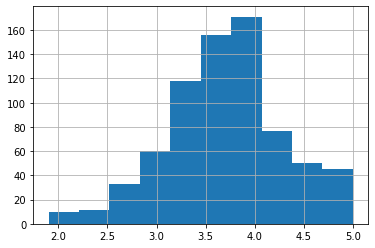

In [36]:
#ENTER###############################################################################################################################
#df.Rating.hist() ##Ken Jee way
#Watching Rating values without the -1 values.
df[(df['Rating'] > 0)]['Rating'].hist()

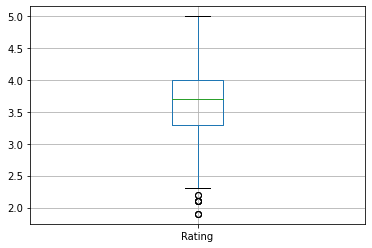

In [37]:
df[df['Rating']>=0][['Rating']].boxplot()
plt.show()

array([[<AxesSubplot:title={'center':'avg_salary'}>,
        <AxesSubplot:title={'center':'min_salary'}>],
       [<AxesSubplot:title={'center':'max_salary'}>, <AxesSubplot:>]],
      dtype=object)

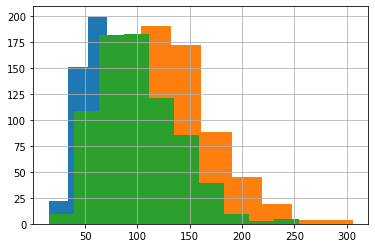

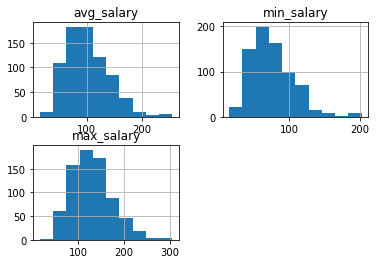

In [38]:
#ENTER###############################################################################################################################
#Comparing average, min and max salary values without losing the sight in the individual graphics
df.min_salary.hist()
df.max_salary.hist()
df.avg_salary.hist()

df[['avg_salary','min_salary','max_salary']].hist()

<AxesSubplot:>

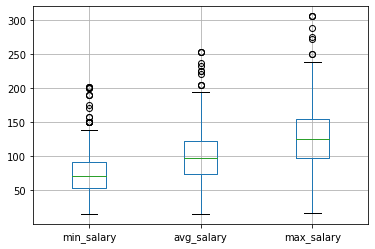

In [39]:
df.boxplot(column= ['min_salary','avg_salary','max_salary'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Founded'}>]], dtype=object)

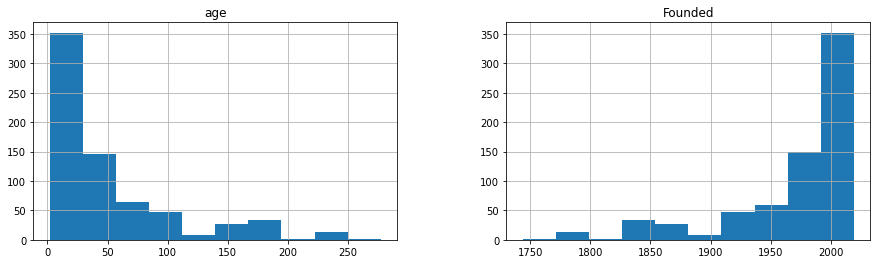

In [40]:
#ENTER###############################################################################################################################
#Here one of the graphics is enough, but I wonted to see both.
df[(df['age'] > 0)&(df['Founded'] > 0)][['age','Founded']].hist(figsize=(15,4))


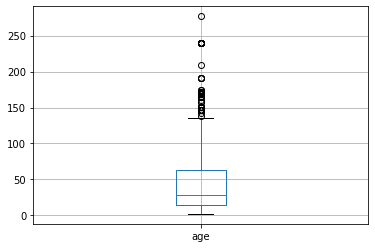

In [41]:
df[df['age']>=0][['age']].boxplot()
plt.show()

array([[<AxesSubplot:title={'center':'desc_len'}>,
        <AxesSubplot:title={'center':'desc_len_words'}>]], dtype=object)

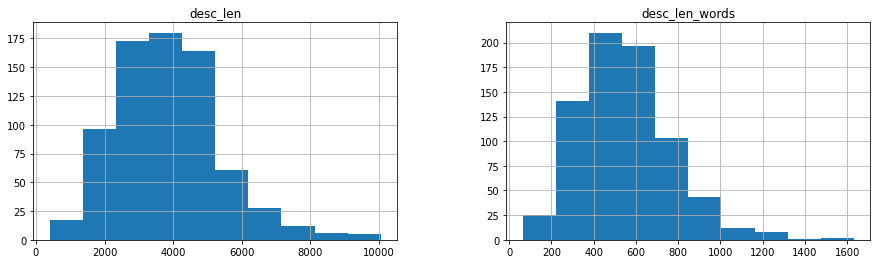

In [42]:
#ENTER###############################################################################################################################
#Watching the distribution in lenght of job description text characterized by characters and by words.
df[['desc_len','desc_len_words']].hist(figsize=(15,4))


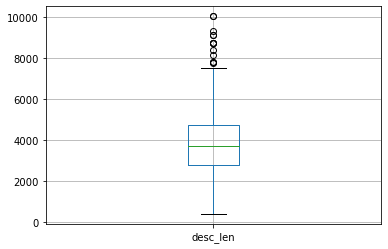

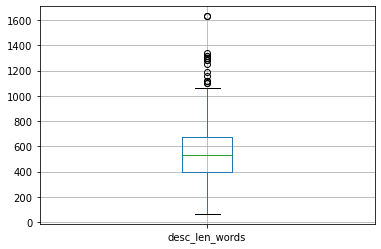

In [43]:
df.boxplot(column= ['desc_len'])
plt.show()
df.boxplot(column= ['desc_len_words'])
plt.show()

In [44]:
df[['age','avg_salary','Rating','desc_len']].corr()
#I think that when we gonna compare Ratings with other features the fact that it has -1 values is RELEVANT.


,age,avg_salary,Rating,desc_len
age,1.000000,0.021745,0.023162,0.164188
avg_salary,0.021745,1.000000,0.012645,0.071316
Rating,0.023162,0.012645,1.000000,-0.012281
desc_len,0.164188,0.071316,-0.012281,1.000000


<AxesSubplot:>

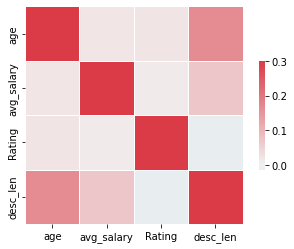

In [45]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [46]:
df[(df['age']>=0) & (df['Rating']>=0)][['age','avg_salary','min_salary','max_salary','Rating','desc_len','desc_len_words']].corr()
    #I let min and max salary cause I would like to detect some correlation with a bigger salary range and a smaller rank


,age,avg_salary,min_salary,max_salary,Rating,desc_len,desc_len_words
age,1.000000,0.033613,0.022723,0.042913,-0.108796,0.148882,0.122020
avg_salary,0.033613,1.000000,0.941937,0.969353,0.128892,0.099415,0.107684
min_salary,0.022723,0.941937,1.000000,0.944010,0.146429,0.070525,0.078279
max_salary,0.042913,0.969353,0.944010,1.000000,0.102397,0.080419,0.083405
Rating,-0.108796,0.128892,0.146429,0.102397,1.000000,-0.102428,-0.079105
desc_len,0.148882,0.099415,0.070525,0.080419,-0.102428,1.000000,0.990683
desc_len_words,0.122020,0.107684,0.078279,0.083405,-0.079105,0.990683,1.000000


<AxesSubplot:>

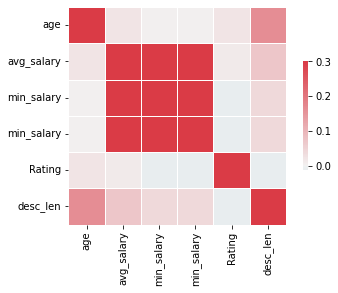

In [47]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','min_salary','min_salary','Rating','desc_len']].corr(), vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [48]:
#Same as before, but without columns with '-1' values
df[(df['age']>=0) & (df['Rating']>=0)][['age','avg_salary','Rating','desc_len','desc_len_words']].corr()
    #This should not be more different than the previous, but more accurate


,age,avg_salary,Rating,desc_len,desc_len_words
age,1.000000,0.033613,-0.108796,0.148882,0.122020
avg_salary,0.033613,1.000000,0.128892,0.099415,0.107684
Rating,-0.108796,0.128892,1.000000,-0.102428,-0.079105
desc_len,0.148882,0.099415,-0.102428,1.000000,0.990683
desc_len_words,0.122020,0.107684,-0.079105,0.990683,1.000000


<AxesSubplot:>

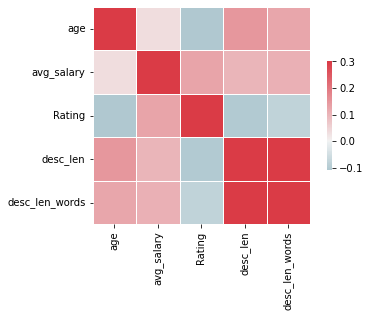

In [49]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[(df['age']>=0) & (df['Rating']>=0)][['age','avg_salary','Rating','desc_len','desc_len_words']].corr(), vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [50]:
#Same as before, but without columns with '-1' values
df[(df['age']>=0) & (df['Rating']>=0)][['avg_salary','desc_len','desc_len_words']].corr()
    #This should not be more different than the previous, but more accurate


,avg_salary,desc_len,desc_len_words
avg_salary,1.000000,0.099415,0.107684
desc_len,0.099415,1.000000,0.990683
desc_len_words,0.107684,0.990683,1.000000


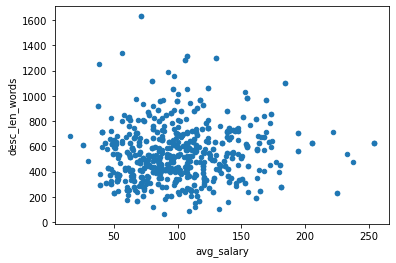

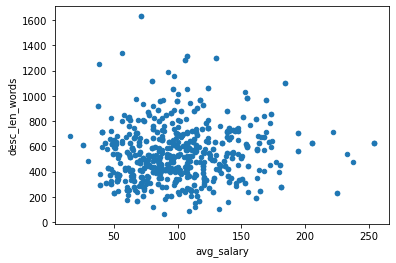

In [51]:
df.plot.scatter(x='avg_salary', y='desc_len_words')
plt.show()
df.plot.scatter(x='avg_salary', y='desc_len_words')
plt.show()

## Keywords

array([[<AxesSubplot:title={'center':'python_yn'}>,
        <AxesSubplot:title={'center':'R_yn'}>,
        <AxesSubplot:title={'center':'spark_yn'}>,
        <AxesSubplot:title={'center':'aws_yn'}>,
        <AxesSubplot:title={'center':'excel_yn'}>,
        <AxesSubplot:title={'center':'sql_yn'}>],
       [<AxesSubplot:title={'center':'sas_yn'}>,
        <AxesSubplot:title={'center':'d3js_yn'}>,
        <AxesSubplot:title={'center':'julia_yn'}>,
        <AxesSubplot:title={'center':'jupyter_yn'}>,
        <AxesSubplot:title={'center':'keras_yn'}>,
        <AxesSubplot:title={'center':'matlab_yn'}>],
       [<AxesSubplot:title={'center':'matplotlib_yn'}>,
        <AxesSubplot:title={'center':'pytorch_yn'}>,
        <AxesSubplot:title={'center':'scikit_yn'}>,
        <AxesSubplot:title={'center':'tensor_yn'}>,
        <AxesSubplot:title={'center':'weka_yn'}>,
        <AxesSubplot:title={'center':'selenium_yn'}>],
       [<AxesSubplot:title={'center':'hadoop_yn'}>,
        <AxesSubplot:ti

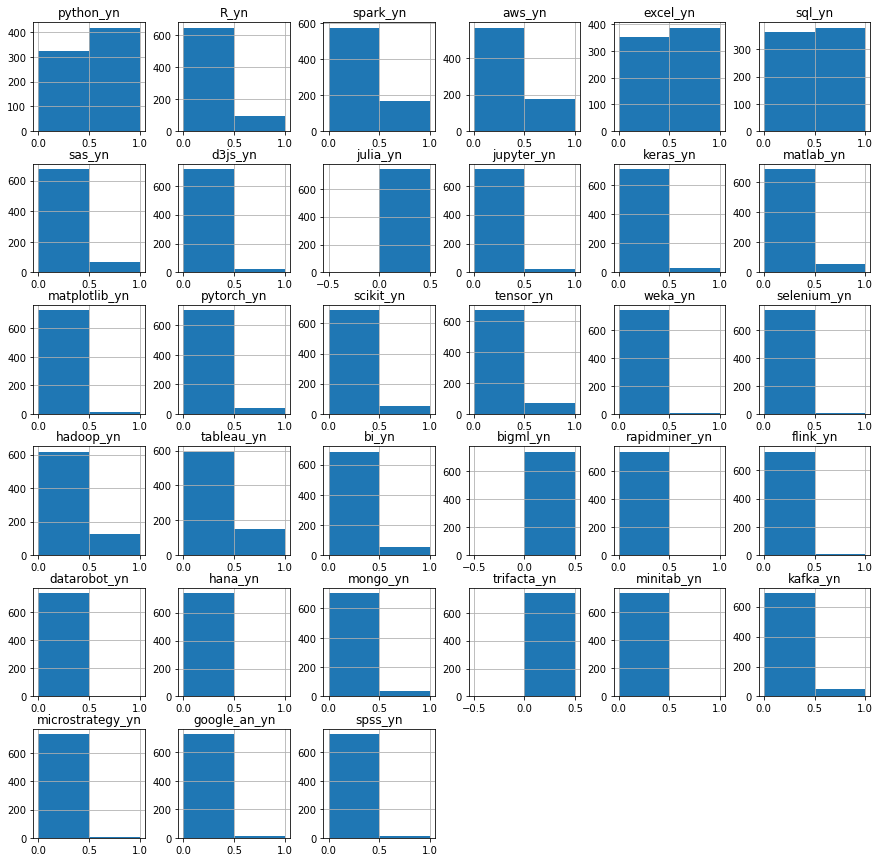

In [52]:
#ENTER###############################################################################################################################
#Comparing quantity of each keyword considered.
#df.columns
list_yn = ['python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'sas_yn', 'd3js_yn', 'julia_yn', 'jupyter_yn', 'keras_yn', 'matlab_yn',
       'matplotlib_yn', 'pytorch_yn', 'scikit_yn', 'tensor_yn', 'weka_yn',
       'selenium_yn', 'hadoop_yn', 'tableau_yn', 'bi_yn', 'bigml_yn',
       'rapidminer_yn', 'flink_yn', 'datarobot_yn', 'hana_yn', 'mongo_yn',
       'trifacta_yn', 'minitab_yn', 'kafka_yn', 'microstrategy_yn',
       'google_an_yn', 'spss_yn']
#df[['python_yn','R_yn','spark_yn','aws_yn', 'excel_yn']].hist(bins=2,figsize=(10,10))
df[list_yn].hist(bins=2,figsize=(15,15))

In [53]:
#ENTER###############################################################################################################################
df[list_yn].apply(pd.value_counts)

,python_yn,R_yn,spark_yn,aws_yn,excel_yn,sql_yn,sas_yn,d3js_yn,julia_yn,jupyter_yn,...,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn
0,324,645,575,566,354,362,676,717,742.0,717,...,732,737,741,705,742.0,738,692,733,728,726
1,418,97,167,176,388,380,66,25,NaN,25,...,10,5,1,37,NaN,4,50,9,14,16


In [54]:
df[list_yn].corr()

,python_yn,R_yn,spark_yn,aws_yn,excel_yn,sql_yn,sas_yn,d3js_yn,julia_yn,jupyter_yn,...,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn
python_yn,1.000000,0.204388,0.324819,0.177923,-0.035780,0.325792,0.065095,0.104159,NaN,0.164397,...,0.055771,0.039302,0.032343,0.089338,NaN,0.027707,0.171619,0.097556,-0.017711,0.074578
R_yn,0.204388,1.000000,0.001613,-0.009475,0.130290,0.090567,0.103532,0.060528,NaN,0.060528,...,-0.045326,0.163528,-0.014246,0.002995,NaN,-0.028550,-0.040450,-0.042971,0.004990,0.080049
spark_yn,0.324819,0.001613,1.000000,0.298822,-0.047334,0.261304,-0.055031,0.131870,NaN,0.096100,...,0.216880,-0.044389,0.068166,0.232356,NaN,-0.039676,0.382923,0.028726,-0.051017,-0.080005
aws_yn,0.177923,-0.009475,0.298822,1.000000,-0.019235,0.106902,-0.140850,0.053909,NaN,0.124146,...,0.154647,0.108980,-0.020485,0.177929,NaN,-0.041053,0.292461,0.053988,-0.077330,-0.082783
excel_yn,-0.035780,0.130290,-0.047334,-0.019235,1.000000,0.109548,0.052017,0.028820,NaN,-0.060904,...,-0.028762,0.045694,0.035089,0.094860,NaN,-0.003377,-0.012330,0.031892,0.112628,0.011767
sql_yn,0.325792,0.090567,0.261304,0.106902,0.109548,1.000000,0.200788,0.122482,NaN,0.137424,...,-0.049602,0.047436,0.035855,0.198825,NaN,-0.001786,0.079519,0.108151,0.056085,0.144895
sas_yn,0.065095,0.103532,-0.055031,-0.140850,0.052017,0.200788,1.000000,0.072844,NaN,-0.005870,...,-0.036521,-0.025737,0.117569,0.102419,NaN,0.106306,-0.083991,-0.034623,0.095853,0.312142
d3js_yn,0.104159,0.060528,0.131870,0.053909,0.028820,0.122482,0.072844,1.000000,NaN,0.213501,...,-0.021825,-0.015380,-0.006860,0.025852,NaN,-0.013747,-0.050193,-0.020691,-0.025895,-0.027721
julia_yn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jupyter_yn,0.164397,0.060528,0.096100,0.124146,-0.060904,0.137424,-0.005870,0.213501,NaN,1.000000,...,-0.021825,0.349807,-0.006860,0.025852,NaN,-0.013747,-0.050193,-0.020691,-0.025895,-0.027721


<AxesSubplot:>

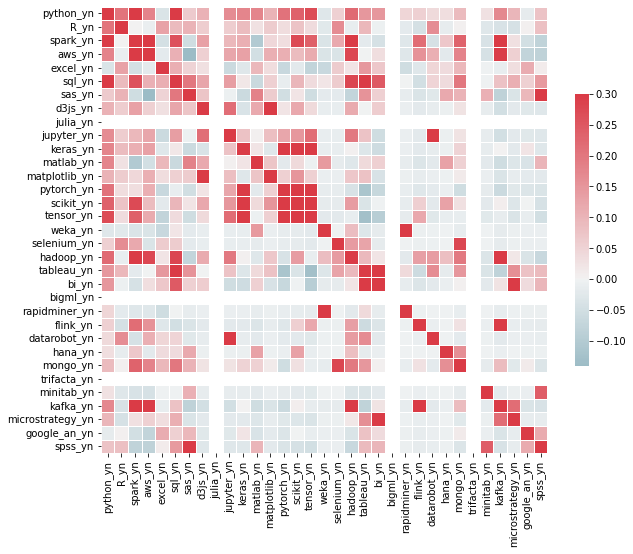

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[list_yn].corr(), vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})
#here can be seen wich words group more aften.

In [56]:
list_yn_salary = ['avg_salary']
list_yn_salary.extend(list_yn)

df[list_yn_salary].corr()
#Aplying point biserial correlation 

,avg_salary,python_yn,R_yn,spark_yn,aws_yn,excel_yn,sql_yn,sas_yn,d3js_yn,julia_yn,...,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn
avg_salary,1.000000,0.301668,0.113410,0.171735,0.172592,-0.070162,0.005448,0.102538,0.049938,NaN,...,0.085872,0.030522,0.044565,0.071382,NaN,-0.013664,0.065815,-0.038522,-0.122292,-0.061830
python_yn,0.301668,1.000000,0.204388,0.324819,0.177923,-0.035780,0.325792,0.065095,0.104159,NaN,...,0.055771,0.039302,0.032343,0.089338,NaN,0.027707,0.171619,0.097556,-0.017711,0.074578
R_yn,0.113410,0.204388,1.000000,0.001613,-0.009475,0.130290,0.090567,0.103532,0.060528,NaN,...,-0.045326,0.163528,-0.014246,0.002995,NaN,-0.028550,-0.040450,-0.042971,0.004990,0.080049
spark_yn,0.171735,0.324819,0.001613,1.000000,0.298822,-0.047334,0.261304,-0.055031,0.131870,NaN,...,0.216880,-0.044389,0.068166,0.232356,NaN,-0.039676,0.382923,0.028726,-0.051017,-0.080005
aws_yn,0.172592,0.177923,-0.009475,0.298822,1.000000,-0.019235,0.106902,-0.140850,0.053909,NaN,...,0.154647,0.108980,-0.020485,0.177929,NaN,-0.041053,0.292461,0.053988,-0.077330,-0.082783
excel_yn,-0.070162,-0.035780,0.130290,-0.047334,-0.019235,1.000000,0.109548,0.052017,0.028820,NaN,...,-0.028762,0.045694,0.035089,0.094860,NaN,-0.003377,-0.012330,0.031892,0.112628,0.011767
sql_yn,0.005448,0.325792,0.090567,0.261304,0.106902,0.109548,1.000000,0.200788,0.122482,NaN,...,-0.049602,0.047436,0.035855,0.198825,NaN,-0.001786,0.079519,0.108151,0.056085,0.144895
sas_yn,0.102538,0.065095,0.103532,-0.055031,-0.140850,0.052017,0.200788,1.000000,0.072844,NaN,...,-0.036521,-0.025737,0.117569,0.102419,NaN,0.106306,-0.083991,-0.034623,0.095853,0.312142
d3js_yn,0.049938,0.104159,0.060528,0.131870,0.053909,0.028820,0.122482,0.072844,1.000000,NaN,...,-0.021825,-0.015380,-0.006860,0.025852,NaN,-0.013747,-0.050193,-0.020691,-0.025895,-0.027721
julia_yn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

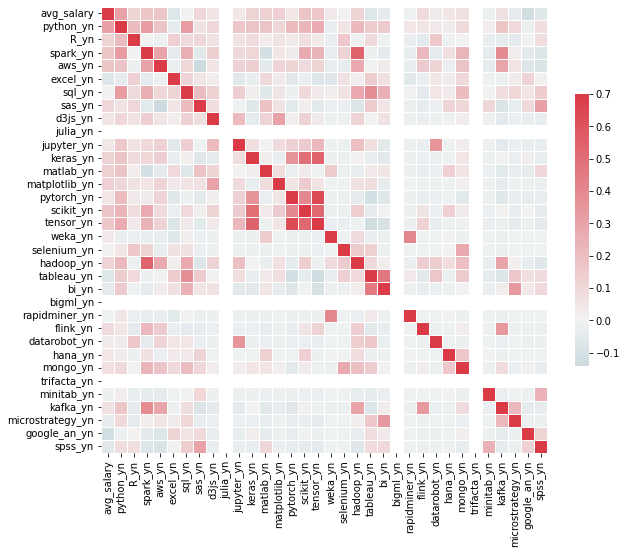

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[list_yn_salary].corr(), vmax=.7,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})


In [58]:
#Here I take only the rows with the correspondent keyword each time
    #I mean, For example, I read the python_yn column and take just the rows where I have '1' (those who say 'python' in the job description)
    #then with those rows (in a new df) I apply function .describe()
    #And star again with each keyword.
    #Note: first column is calculated with all the rows in the original cleaned df.
def kw_to_avg_salary(dff, list_yn):
    df_listyn = dff[['avg_salary']].describe()
    for index, item in enumerate(list_yn):
        df_listyn['av_sal_'+list_yn[index]] = dff[dff[list_yn[index]]>0]['avg_salary'].describe()
    return df_listyn   
        
        
desc_kw_to_avg_salary = kw_to_avg_salary(df,list_yn)
desc_kw_to_avg_salary

,avg_salary,av_sal_python_yn,av_sal_R_yn,av_sal_spark_yn,av_sal_aws_yn,av_sal_excel_yn,av_sal_sql_yn,av_sal_sas_yn,av_sal_d3js_yn,av_sal_julia_yn,...,av_sal_flink_yn,av_sal_datarobot_yn,av_sal_hana_yn,av_sal_mongo_yn,av_sal_trifacta_yn,av_sal_minitab_yn,av_sal_kafka_yn,av_sal_microstrategy_yn,av_sal_google_an_yn,av_sal_spss_yn
count,742.000000,418.000000,97.000000,167.000000,176.000000,388.000000,380.000000,66.000000,25.000000,0.0,...,10.000000,5.000000,1.0,37.000000,0.0,4.000000,50.000000,9.000000,14.000000,16.00000
mean,101.357817,111.350478,112.360825,113.347305,113.002841,98.836340,101.557895,113.704545,111.420000,NaN,...,129.000000,115.300000,147.0,113.081081,NaN,94.375000,110.570000,88.277778,68.178571,85.68750
std,37.649580,36.882060,36.478500,32.835833,37.189342,37.375162,34.857294,48.788632,33.975996,NaN,...,28.563769,20.780399,NaN,27.843938,NaN,6.209871,29.947234,32.192887,25.986392,20.22859
min,15.500000,38.000000,15.500000,47.000000,40.500000,15.500000,37.500000,48.500000,59.000000,NaN,...,95.000000,81.000000,147.0,60.500000,NaN,85.500000,51.500000,51.500000,48.500000,49.00000
25%,73.500000,85.500000,87.000000,90.250000,88.000000,70.500000,76.375000,78.625000,85.000000,NaN,...,105.375000,110.000000,147.0,97.000000,NaN,93.375000,91.500000,61.500000,49.250000,66.50000
50%,97.500000,107.000000,109.500000,108.000000,107.000000,92.000000,98.500000,101.500000,108.000000,NaN,...,127.250000,128.500000,147.0,112.500000,NaN,96.000000,105.500000,95.500000,53.500000,87.50000
75%,122.500000,133.000000,139.500000,138.000000,139.375000,120.250000,121.000000,140.000000,139.500000,NaN,...,151.375000,128.500000,147.0,123.500000,NaN,97.000000,132.875000,107.000000,86.500000,98.62500
max,254.000000,254.000000,237.500000,205.000000,225.000000,237.500000,232.500000,254.000000,164.000000,NaN,...,177.000000,128.500000,147.0,177.000000,NaN,100.000000,177.000000,129.500000,128.000000,121.00000


<AxesSubplot:>

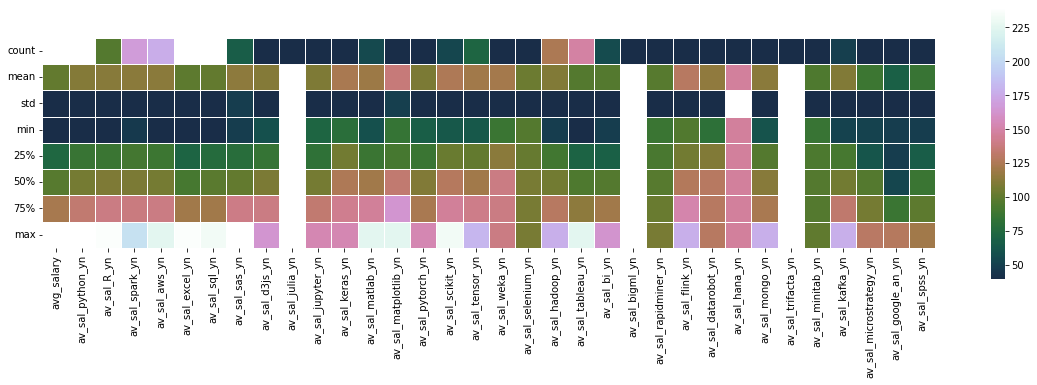

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
# sns.color_palette("mako", as_cmap=True)
sns.heatmap(desc_kw_to_avg_salary, vmin=40, vmax=240,center=120,cmap="cubehelix",square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [60]:
desc_kw_to_avg_salary.loc[['mean']]
#Another way to do this:    #df[list_yn_salary].vivot()
                            #pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary,av_sal_python_yn,av_sal_R_yn,av_sal_spark_yn,av_sal_aws_yn,av_sal_excel_yn,av_sal_sql_yn,av_sal_sas_yn,av_sal_d3js_yn,av_sal_julia_yn,...,av_sal_flink_yn,av_sal_datarobot_yn,av_sal_hana_yn,av_sal_mongo_yn,av_sal_trifacta_yn,av_sal_minitab_yn,av_sal_kafka_yn,av_sal_microstrategy_yn,av_sal_google_an_yn,av_sal_spss_yn
mean,101.357817,111.350478,112.360825,113.347305,113.002841,98.83634,101.557895,113.704545,111.42,NaN,...,129.0,115.3,147.0,113.081081,NaN,94.375,110.57,88.277778,68.178571,85.6875


<AxesSubplot:>

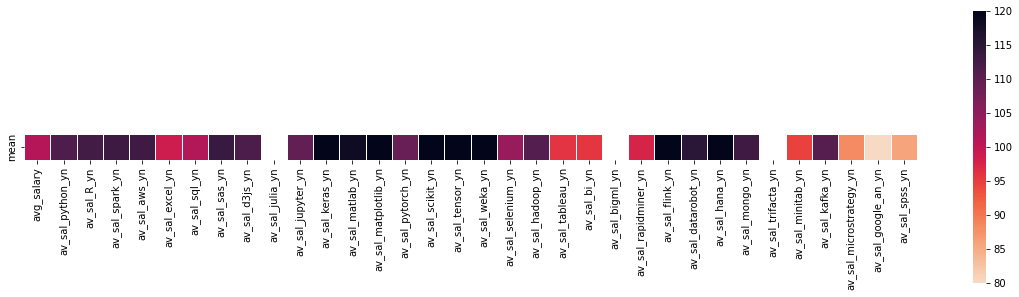

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
# sns.color_palette("mako", as_cmap=True)
sns.heatmap(desc_kw_to_avg_salary.loc[['mean']], vmin=80, vmax=120,center=99,cmap="rocket_r",square=True,linewidths=.5,cbar_kws={"shrink": .5})

## Anlyzing keywords

In [62]:
#Here, I want to compare how many times the keywords are labeled in each Job Description with the salaries. This can be considered as "while more especific the skill descripted is the salary better?"
    #firs I creat a new column that count how many words are labeled in each Job Description.
df['count_keywords'] = df[list_yn].sum(axis=1)
df['count_keywords'].value_counts()


1     120
2     106
3     101
4      99
0      89
6      75
5      71
7      31
8      24
9      18
10      8
Name: count_keywords, dtype: int64

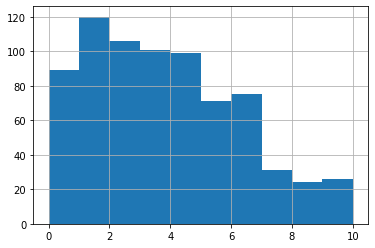

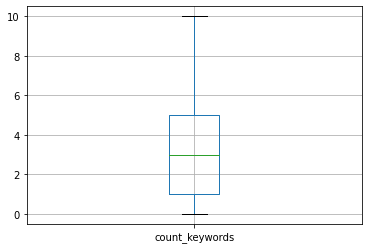

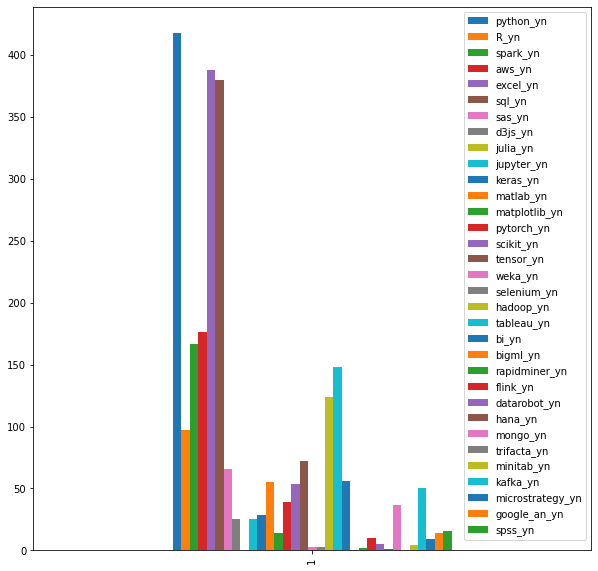

In [63]:
df['count_keywords'].hist()
#df['count_keywords'].plot(kind='bar',rot=90,figsize=[15,15])
plt.show()
df.boxplot(column= ['count_keywords'])
plt.show()
df_list_yn=df[list_yn].apply(pd.value_counts)
df_list_yn[1:].plot(kind='bar',rot=90,figsize=[10,10])
plt.show()

<AxesSubplot:xlabel='count_keywords', ylabel='avg_salary'>

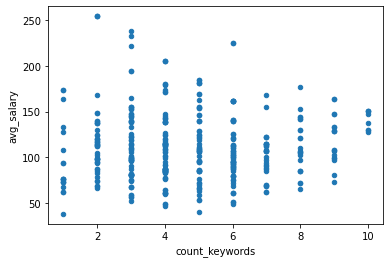

In [64]:
df[df['python_yn']>0].plot.scatter(x='count_keywords', y='avg_salary')
#At first, no correlation can be seen. (Naturally, we are working with a categorical variable and a numerical one)

In [65]:
df[['avg_salary','python_yn']].corr()

,avg_salary,python_yn
avg_salary,1.000000,0.301668
python_yn,0.301668,1.000000


## Comparing lenght descriptions, quantity of keywords and salaries columns:
## -PROBABILITY -


In [66]:
df[['min_salary','max_salary','avg_salary','count_keywords','desc_len']].corr(method ='pearson')
#We can see that a lineal correlation is not a right choice to find a grade of dependency.

,min_salary,max_salary,avg_salary,count_keywords,desc_len
min_salary,1.000000,0.935808,0.942546,0.181408,0.040366
max_salary,0.935808,1.000000,0.968970,0.170214,0.058398
avg_salary,0.942546,0.968970,1.000000,0.220352,0.071316
count_keywords,0.181408,0.170214,0.220352,1.000000,0.156175
desc_len,0.040366,0.058398,0.071316,0.156175,1.000000


In [67]:
df[['min_salary','max_salary','avg_salary','count_keywords','desc_len']].corr(method ='kendall')
#Even worse

,min_salary,max_salary,avg_salary,count_keywords,desc_len
min_salary,1.000000,0.814611,0.841196,0.148445,0.031901
max_salary,0.814611,1.000000,0.891566,0.121877,0.045940
avg_salary,0.841196,0.891566,1.000000,0.176249,0.064476
count_keywords,0.148445,0.121877,0.176249,1.000000,0.084239
desc_len,0.031901,0.045940,0.064476,0.084239,1.000000


We can take into acount that the correlation is calculated based in lineal geometry.

But, what happen if we cluster values by quantiles?

### Quantity of keywords mentioned and  Job Descriptions lenghts 

In [68]:
#Is the number of keywords equivalent to the lenght of the description?
    #In other words, if the lenght of the description is from the 3rd quantile, so is the number of keywords
    #This means that in this rows I'm talking about a job whose descriptions is between the longest and have the more mentioned keywords.
    
    
def kw_dl_same_quantile(dff,list_2_col,kw_dl_quant): #Comparing row to row - quantile to quantile
    if dff[list_2_col[0]]>kw_dl_quant.at[0.75,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.75,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]>kw_dl_quant.at[0.5,list_2_col[0]] and dff[list_2_col[0]]<=kw_dl_quant.at[0.75,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.5,list_2_col[1]] and dff[list_2_col[1]]<=kw_dl_quant.at[0.75,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]>kw_dl_quant.at[0.25,list_2_col[0]] and dff[list_2_col[0]]<=kw_dl_quant.at[0.5,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.25,list_2_col[1]] and dff[list_2_col[1]]<=kw_dl_quant.at[0.5,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]<kw_dl_quant.at[0.25,list_2_col[0]] and dff[list_2_col[1]]<kw_dl_quant.at[0.25,list_2_col[1]]:
        return 1
    else:
        return 0

def compare_2columns_rbr_quant(df_entry, list_two_col):
    #First I define quantiles values
    kw_dl_quant = df[list_two_col].quantile([.25,.5,.75,1])
    
    #and run the previous function row to row.
    nkw_eq_nld = df_entry[list_two_col].apply(lambda x: kw_dl_same_quantile(x,list_two_col,kw_dl_quant),axis=1)
        
    #cCounting how many rows meet the conditions.
    nkw_eq_nld.value_counts()
        #Note: A low quantity of equivalents means that there is no correlation between the quantity of the mentioned keywords and the lenght of the description

    #returning the probability to meet conditions (both colummns to the same percentile).
    return nkw_eq_nld.value_counts().at[1]/len(nkw_eq_nld)
    

In [69]:
#Comparing quantity of keywords with job descriptions lenght, row to row, quantile to quantile
    #"is the quantile in keywords quantity the same as te "
list_two_col = ['count_keywords','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

#Here we take that just the 24% of the rows meet the conditions. This says that there is no direct correlation between both characteristics (lenght of job descriptions and quantity of keywords) or a poor one


0.24797843665768193

### SALARY (average, min and max) and Job Descriptions lenght 

In [70]:
list_two_col = ['avg_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.3086253369272237

In [71]:
list_two_col = ['min_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.2749326145552561

In [72]:
list_two_col = ['max_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.27628032345013476

### Quantity of keywords mentioned and SALARY (average, min and max)

In [73]:
list_two_col = ['count_keywords','avg_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.238544474393531

In [74]:
list_two_col = ['count_keywords','min_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.23450134770889489

In [75]:
list_two_col = ['count_keywords','max_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.2169811320754717

# ME QUEDÉ ACÁ
# ############################################################
# ############################################################



## Just and only focus on Categorical variables:

In [76]:
# df_cat = df[[ 'Location', 'Headquarters','Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state','same_state','R_yn',
#        'spark_yn', 'aws_yn', 'excel_yn', 'py_yn', 'job_simp', 'seniority']]

df_cat = df[[ 'Location', 'Headquarters','Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state','job_simp', 'seniority']]

graph for Location: total = 200


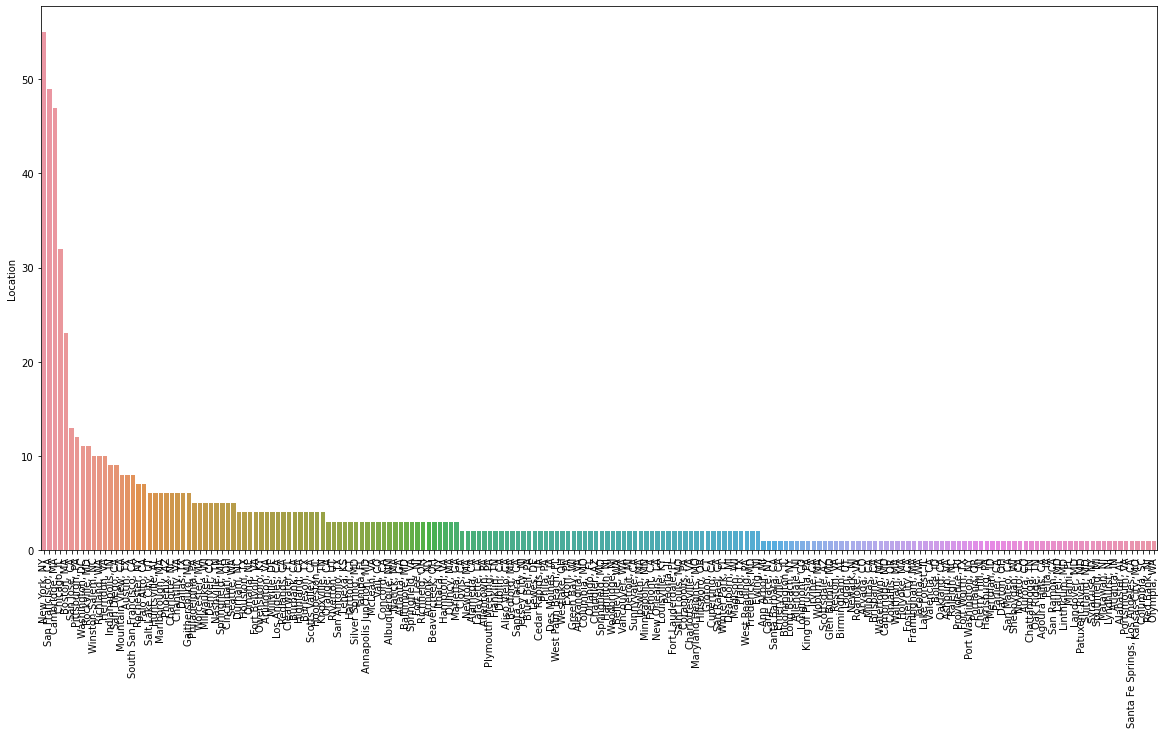

graph for Headquarters: total = 198


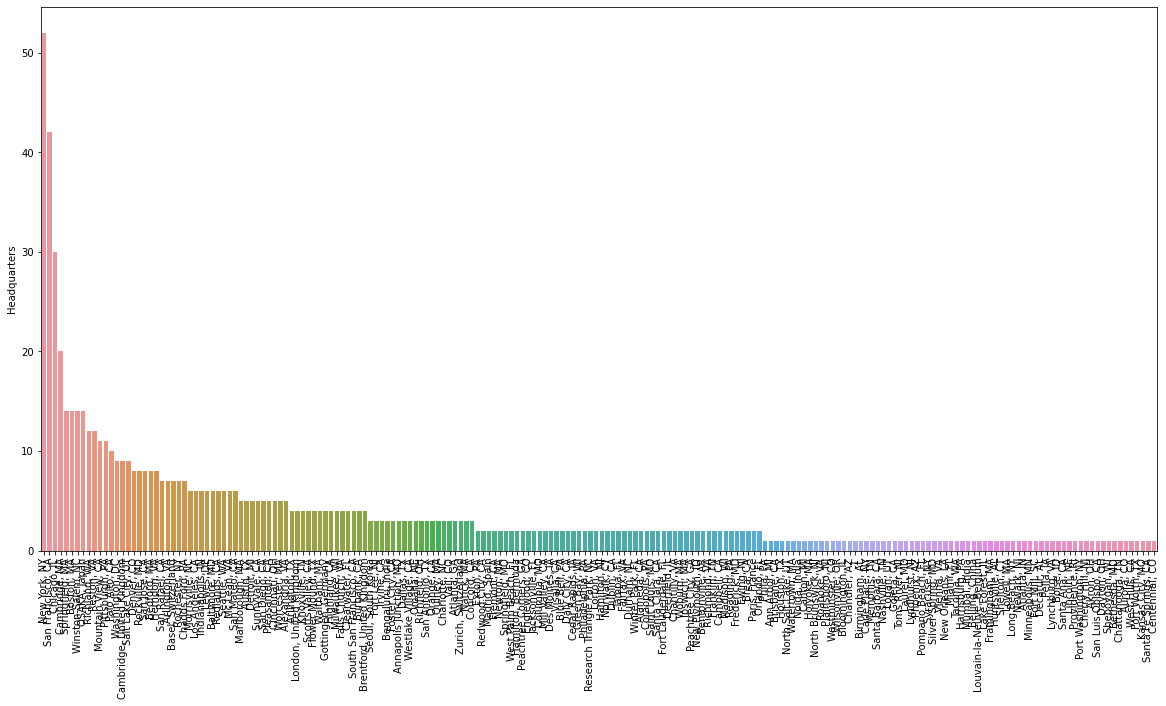

graph for Size: total = 8


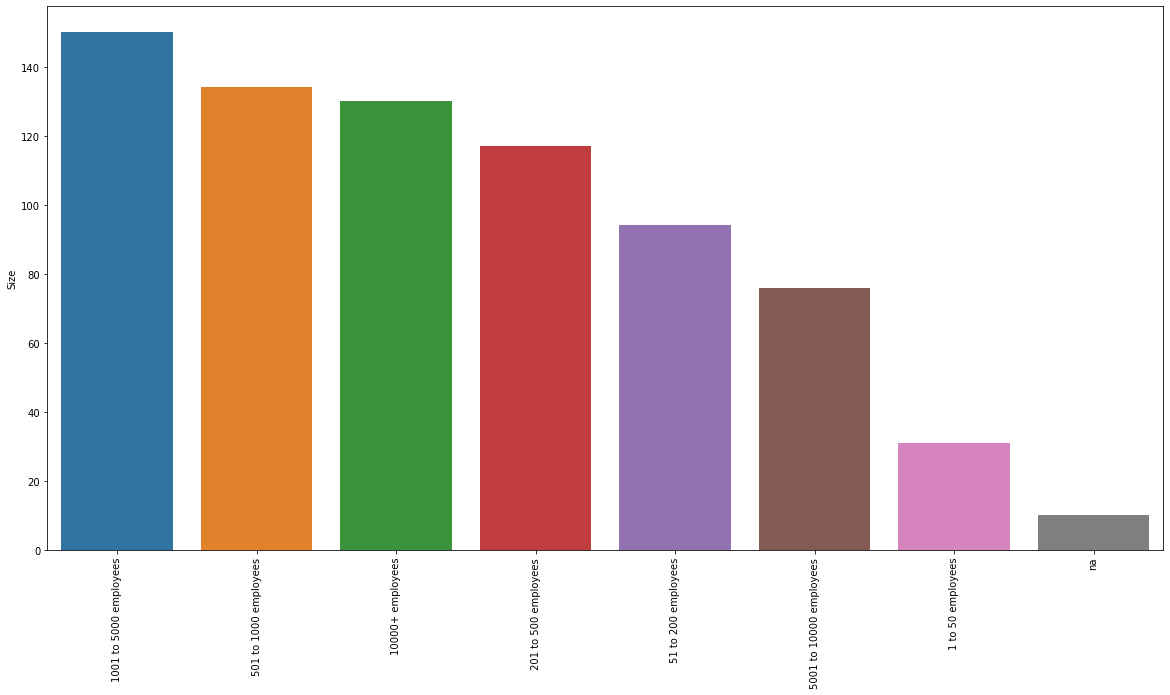

graph for Type of ownership: total = 9


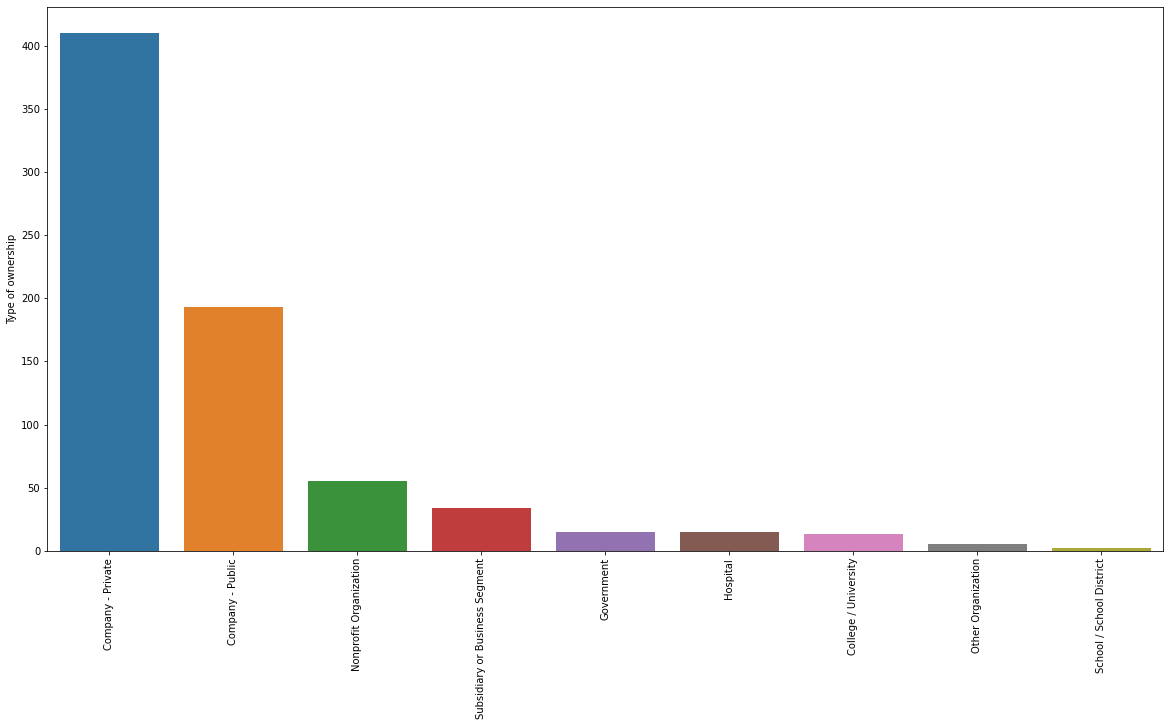

graph for Industry: total = 60


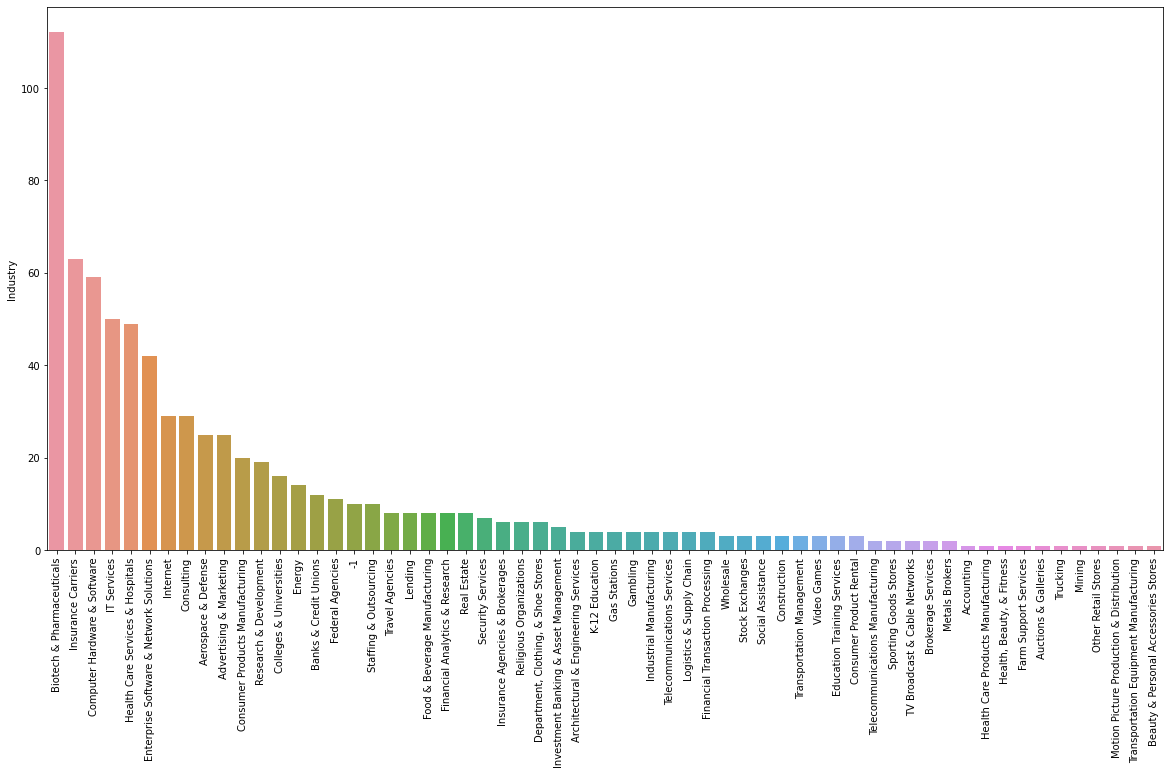

graph for Sector: total = 25


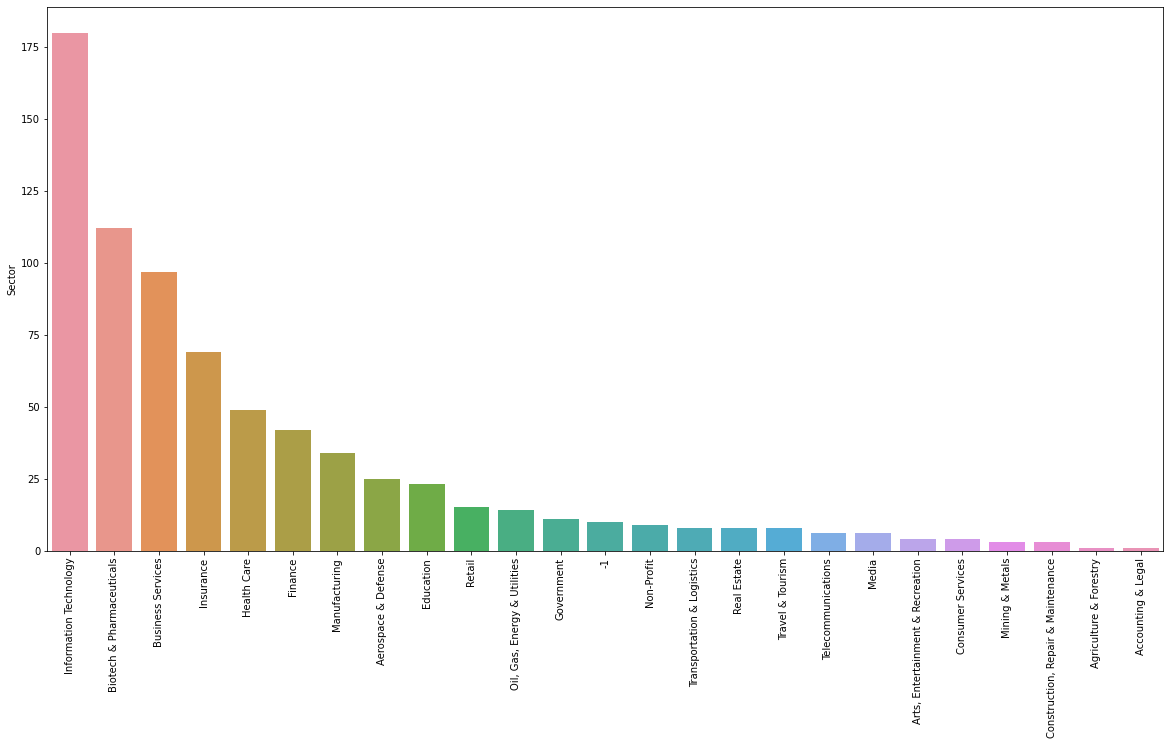

graph for Revenue: total = 13


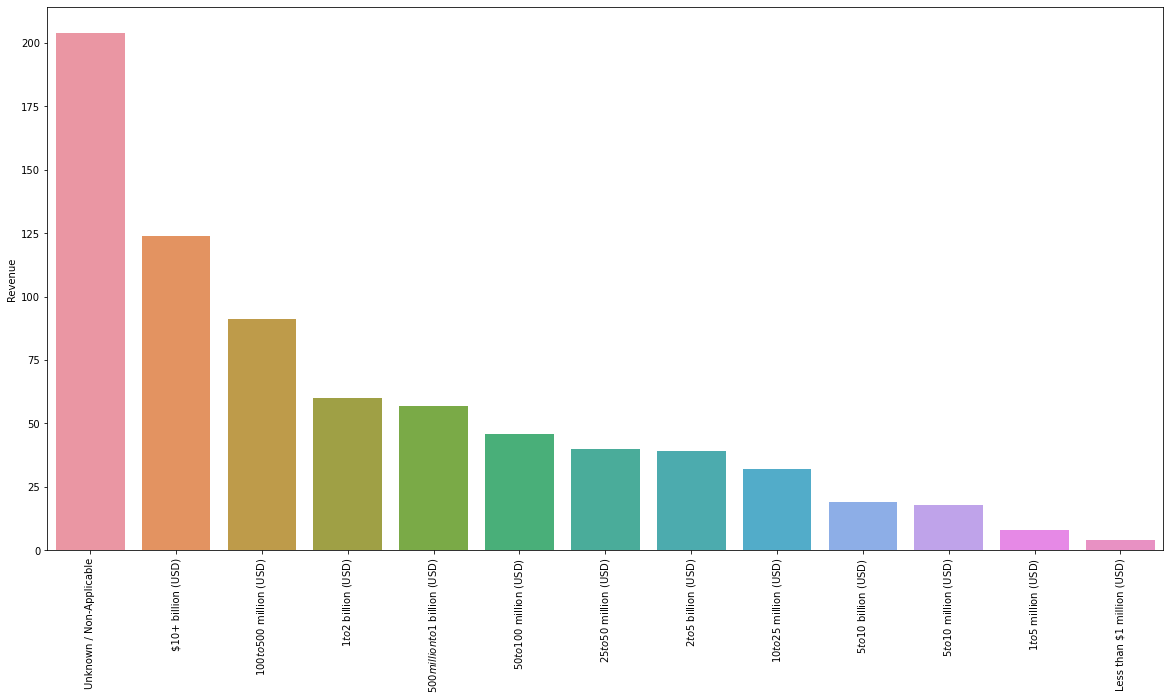

graph for company_txt: total = 343


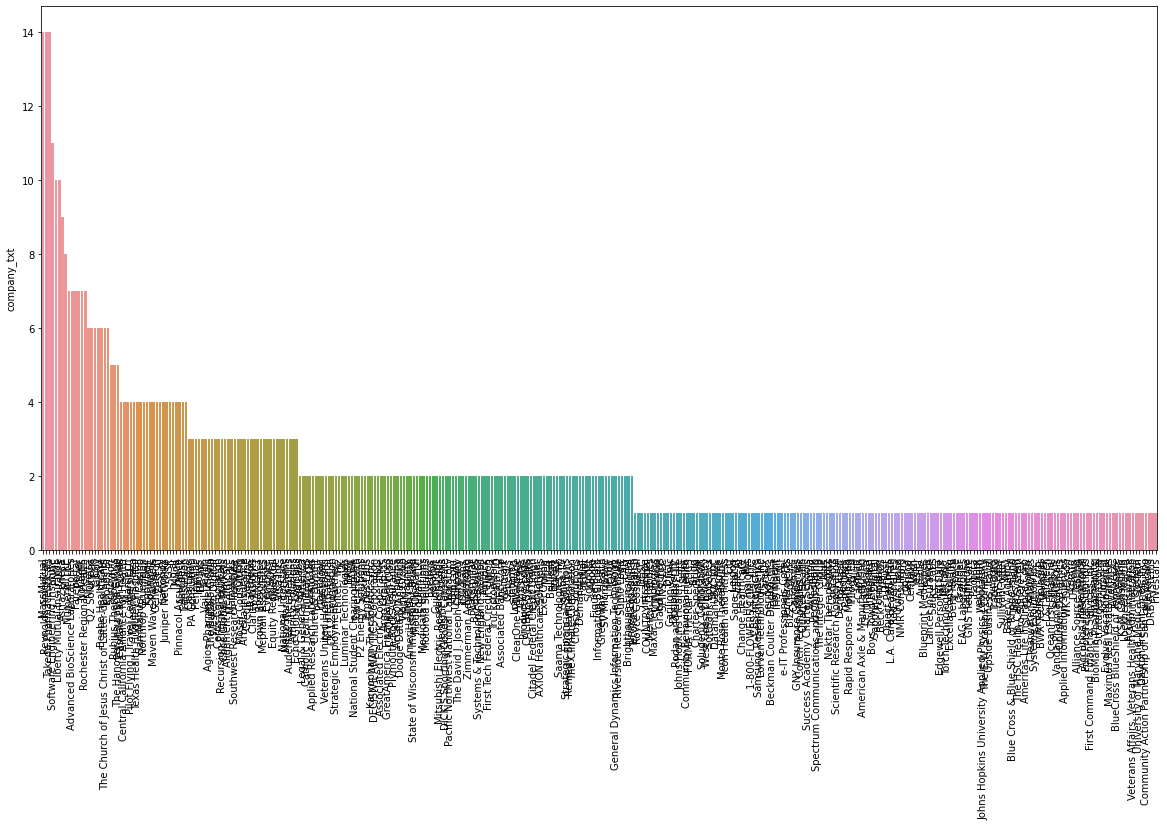

graph for job_state: total = 37


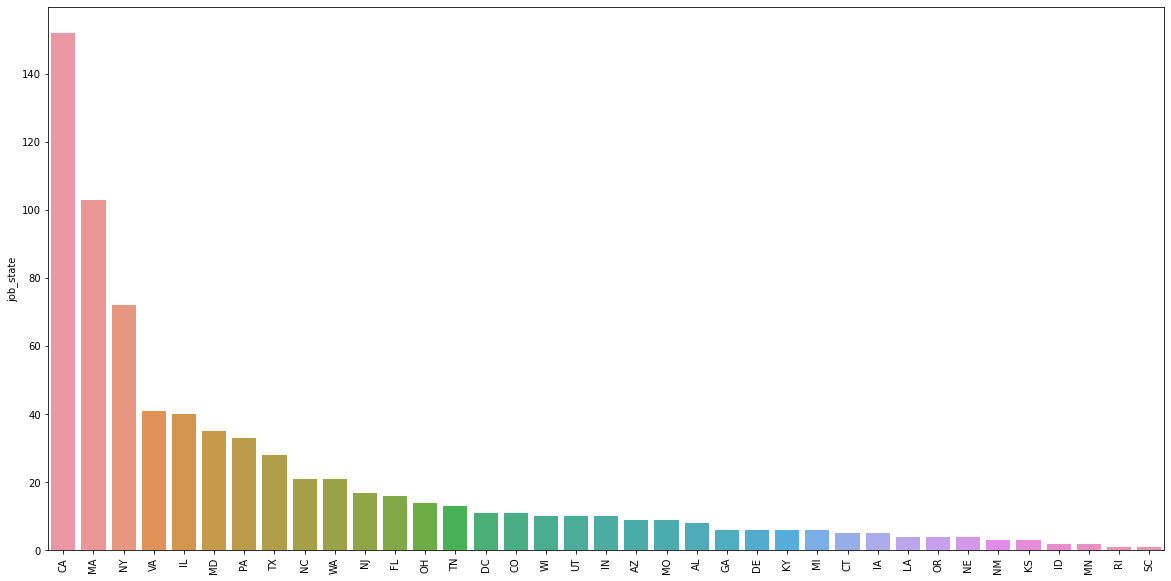

graph for job_simp: total = 10


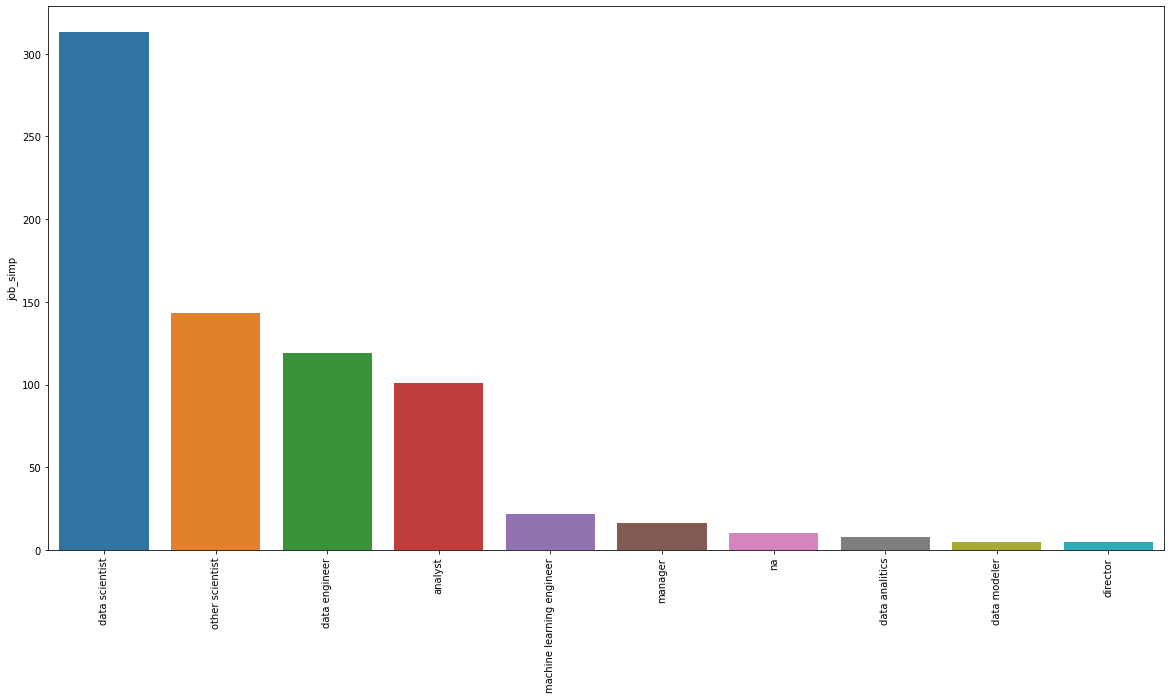

graph for seniority: total = 4


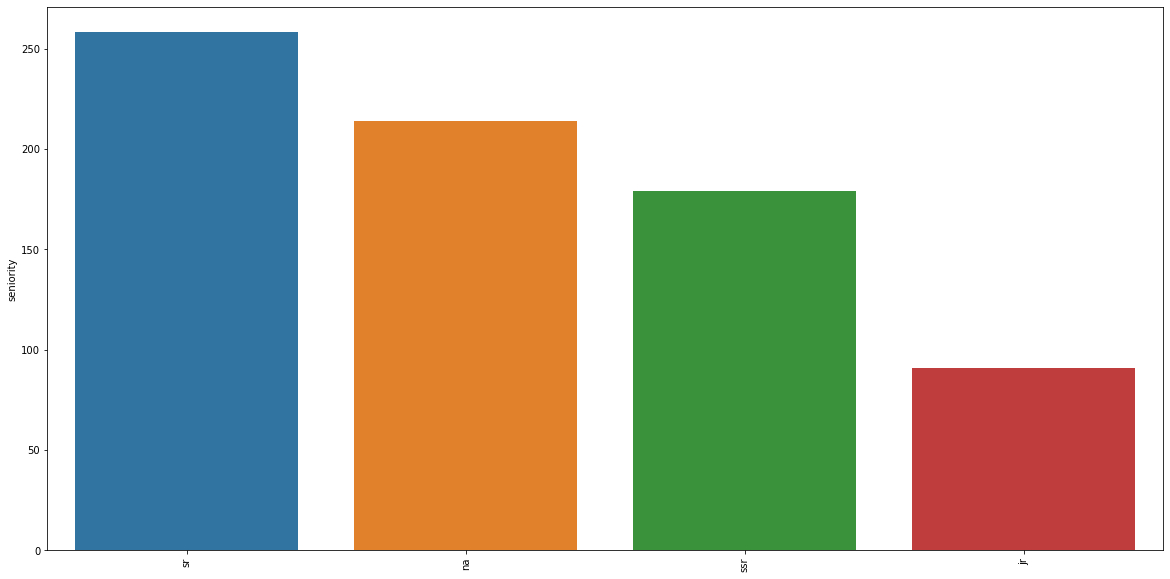

In [77]:

for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(20,10))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    #label rotation
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()  


graph for Location: total = 20


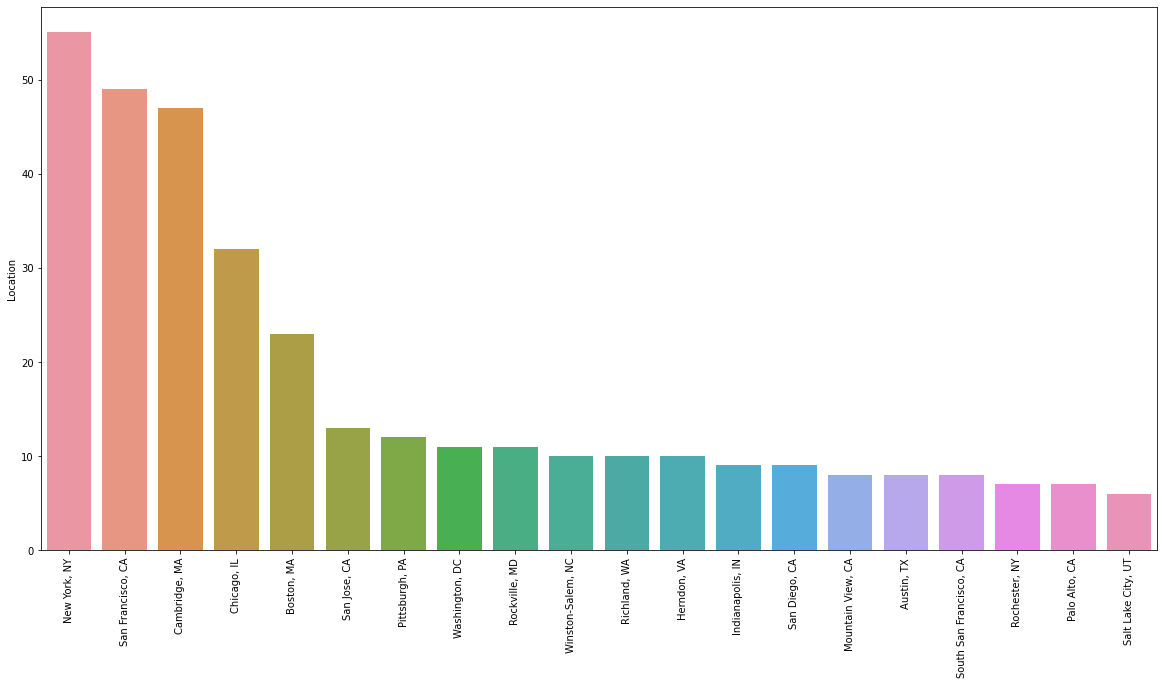

graph for Headquarters: total = 20


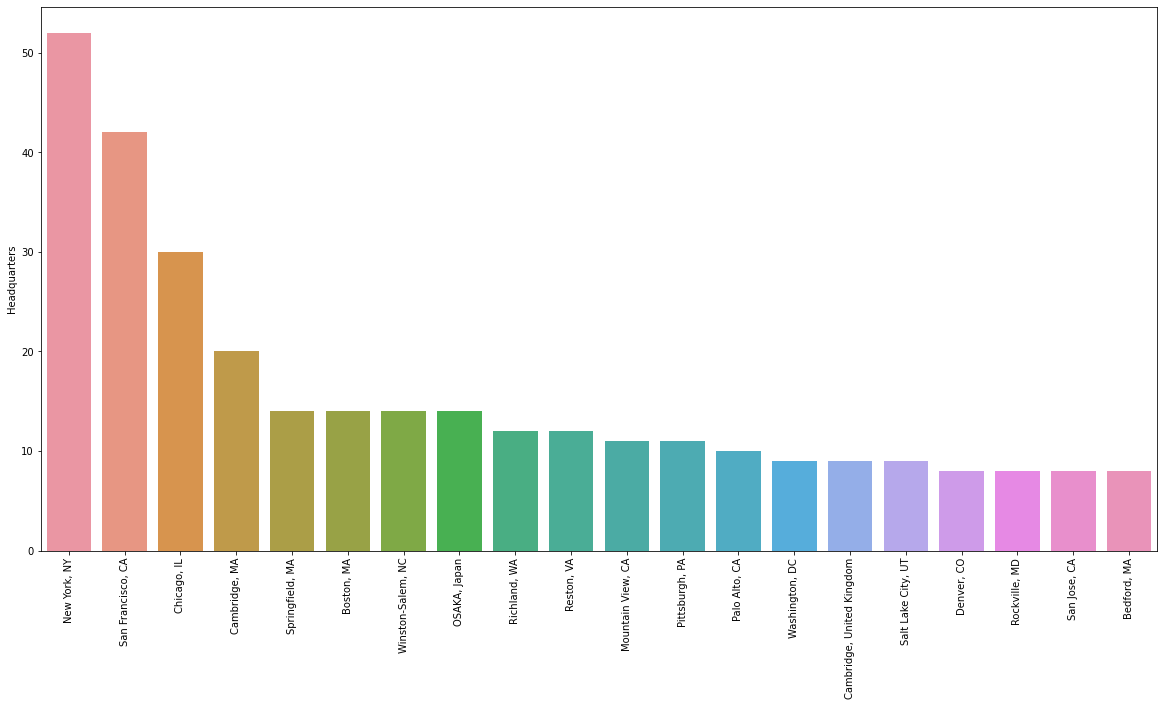

graph for company_txt: total = 20


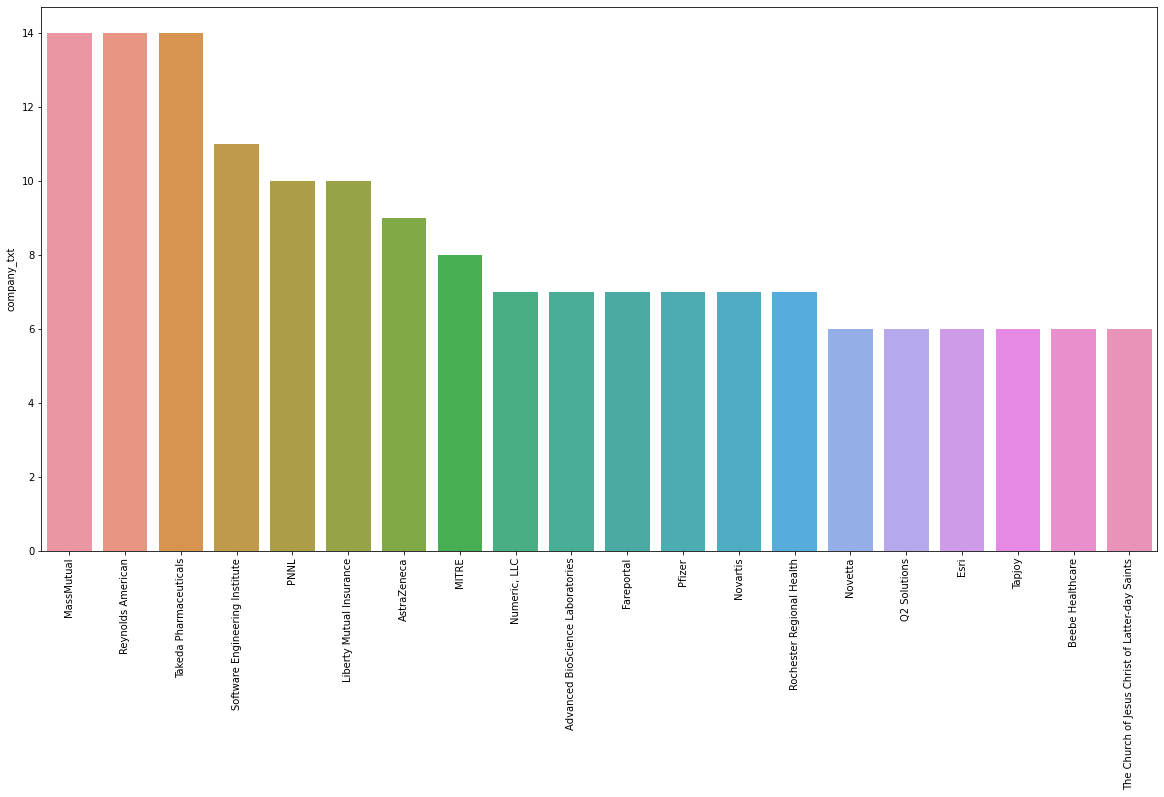

In [78]:
#for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
for i in ['Location', 'Headquarters','company_txt']:    
    #this time, just the top 20 ([:20])
    cat_num=df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(20,10))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    #label rotation
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [79]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,66.074257
data analitics,69.250000
data engineer,105.403361
data modeler,77.500000
data scientist,118.293930
director,130.800000
machine learning engineer,126.431818
manager,73.218750
na,91.450000


In [80]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp                  seniority            
analyst                   jr          51.613636
                          na          65.365385
                          sr          77.913793
                          ssr         65.791667
data analitics            jr          61.833333
                          na         114.500000
                          ssr         63.500000
data engineer             jr          82.500000
                          na         102.903846
                          sr         118.566667
                          ssr         99.833333
data modeler              jr          86.500000
                          na         106.500000
                          ssr         64.833333
data scientist            jr         102.680556
                          na         109.855556
                          sr         136.168103
                          ssr        107.704225
director                  na         120.500000
                          sr         172.000000
machine learning engineer na         122.250000
                          sr         137.166667
                          ssr        113.800000
manager                   na          75.000000
                          sr          64.000000
                          ssr         77.214286
na                        na          84.300000
                          sr         111.250000
                          ssr         48.000000
other scientist           jr          87.678571
                          na          70.583333
                          sr         110.180000
                          ssr         76.693548

In [81]:
pd.pivot_table(df, index = ['job_simp','seniority','python_yn'], values = 'avg_salary')

avg_salary
job_simp                  seniority python_yn            
analyst                   jr        0           50.166667
                                    1           58.125000
                          na        0           65.843750
                                    1           64.600000
                          sr        0           65.100000
                                    1           91.642857
                          ssr       0           65.175000
                                    1           68.875000
data analitics            jr        1           61.833333
                          na        1          114.500000
                          ssr       0           62.500000
                                    1           66.500000
data engineer             jr        0           88.500000
                                    1           78.500000
                          na        0          109.458333
                                    1           97.285714
                          sr        0          103.000000
                                    1          128.944444
                          ssr       0          122.000000
                                    1           94.907407
data modeler              jr        0           86.500000
                          na        0          106.500000
                          ssr       0           91.500000
                                    1           51.500000
data scientist            jr        0          117.166667
                                    1          101.363636
                          na        0          104.000000
                                    1          111.422535
                          sr        0          117.900000
                                    1          141.186813
                          ssr       0          128.071429
                                    1          102.701754
director                  na        0          120.500000
                          sr        0          172.000000
machine learning engineer na        1          122.250000
                          sr        0          124.000000
                                    1          147.700000
                          ssr       1          113.800000
manager                   na        0           75.250000
                                    1           74.000000
                          sr        0           64.000000
                          ssr       0           70.250000
                                    1           86.500000
na                        na        0           84.300000
                          sr        1          111.250000
                          ssr       0           48.000000
other scientist           jr        0           89.833333
                                    1           83.800000
                          na        0           66.904762
                                    1           96.333333
                          sr        0          106.687500
                                    1          124.150000
                          ssr       0           75.446429
                                    1           88.333333

In [82]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.305825
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [83]:
pd.set_option('display.max_rows', None)  
pd.pivot_table(df, index = ['job_simp','job_state'], values = 'avg_salary').sort_values(['job_simp','avg_salary'],ascending=False)


avg_salary
job_simp                  job_state            
other scientist           MA         111.820513
                          KY         103.500000
                          CA          99.900000
                          WA          97.500000
                          OH          91.166667
                          NC          90.916667
                          MD          86.083333
                          NJ          82.500000
                          GA          80.000000
                          NY          77.800000
                          MO          76.000000
                          PA          70.416667
                          SC          60.500000
                          CO          60.000000
                          WI          54.000000
                          DE          52.500000
                          IL          52.500000
                          TX          52.428571
                          NE          52.250000
                          AL          39.500000
                          LA          38.000000
na                        MA         129.500000
                          MD          93.500000
                          CA          93.000000
                          MO          70.500000
                          AL          48.000000
manager                   NJ         109.500000
                          MI          87.500000
                          MA          74.166667
                          PA          74.000000
                          CA          62.928571
                          MO          40.500000
machine learning engineer CA         177.300000
                          IL         133.000000
                          NY         125.000000
                          PA         120.500000
                          CO         100.500000
                          KS          87.000000
                          VA          87.000000
director                  MA         130.800000
data scientist            DC         149.000000
                          IL         147.095238
                          CA         141.047297
                          UT         140.500000
                          MO         127.666667
                          NJ         125.083333
                          NC         117.000000
                          PA         115.800000
                          NY         115.250000
                          WI         113.500000
                          MD         109.115385
                          CO         108.666667
                          MI         106.625000
                          MA         106.500000
                          AZ         106.166667
                          OH         105.285714
                          VA         102.086957
                          TX         100.730769
                          WA          99.764706
                          OR          98.500000
                          FL          97.357143
                          TN          96.000000
                          IN          91.833333
                          CT          84.000000
                          KY          84.000000
                          GA          81.333333
                          NM          74.333333
                          AL          68.000000
data modeler              MD         106.500000
                          MA          91.500000
                          NY          86.500000
                          IN          51.500000
data engineer             CA         129.540000
                          IN         114.500000
                          TX         113.062500
                          NJ         112.000000
                          MD         109.000000
                          MA         107.291667
                          NC         104.250000
                          IA         102.833333
                          TN         100.950000
                          UT         100.333333
     

In [84]:
st_js_sal=pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values(['job_state','job_simp'],ascending=False)
st_js_sal

avg_salary
job_state job_simp                             
WI        other scientist             54.000000
          data scientist             113.500000
          analyst                     58.833333
WA        other scientist             97.500000
          data scientist              99.764706
          analyst                     54.500000
VA        machine learning engineer   87.000000
          data scientist             102.086957
          data engineer               96.900000
          analyst                     71.583333
UT        data scientist             140.500000
          data engineer              100.333333
          analyst                     54.750000
TX        other scientist             52.428571
          data scientist             100.730769
          data engineer              113.062500
TN        data scientist              96.000000
          data engineer              100.950000
          analyst                     25.500000
SC        other scientist             60.500000
RI        analyst                    100.000000
PA        other scientist             70.416667
          manager                     74.000000
          machine learning engineer  120.500000
          data scientist             115.800000
          data engineer               91.500000
          analyst                     62.750000
OR        data scientist              98.500000
          data engineer               73.000000
OH        other scientist             91.166667
          data scientist             105.285714
          analyst                     53.875000
NY        other scientist             77.800000
          machine learning engineer  125.000000
          data scientist             115.250000
          data modeler                86.500000
          data engineer               86.375000
          data analitics             114.500000
          analyst                     65.607143
NM        data scientist              74.333333
NJ        other scientist             82.500000
          manager                    109.500000
          data scientist             125.083333
          data engineer              112.000000
          analyst                     83.583333
NE        other scientist             52.250000
NC        other scientist             90.916667
          data scientist             117.000000
          data engineer              104.250000
MO        other scientist             76.000000
          na                          70.500000
          manager                     40.500000
          data scientist             127.666667
          analyst                     61.000000
MN        data engineer               95.000000
          analyst                     76.000000
MI        manager                     87.500000
          data scientist             106.625000
MD        other scientist             86.083333
          na                          93.500000
          data scientist             109.115385
          data modeler               106.500000
          data engineer              109.000000
          analyst                     80.666667
MA        other scientist            111.820513
          na                         129.500000
          manager                     74.166667
          director                   130.800000
          data scientist             106.500000
          data modeler                91.500000
          data engineer              107.291667
          analyst                     59.125000
LA        other scientist             38.000000
          data engineer               70.500000
          analyst                     48.000000
KY        other scientist            103.500000
          data scientist              84.000000
KS        machine learning engineer   87.000000
IN        data scientist              91.833333
          data modeler                51.500000
          data engineer              114.500000
          data analitics              66.500000
IL   

In [85]:
pd.set_option('display.max_rows', None)                 #This is to see the whole list.
st_js_count = pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc='count').sort_values(['job_state','job_simp'],ascending=False)
st_js_count 

avg_salary
job_state job_simp                             
WI        other scientist                     4
          data scientist                      3
          analyst                             3
WA        other scientist                     1
          data scientist                     17
          analyst                             3
VA        machine learning engineer           2
          data scientist                     23
          data engineer                      10
          analyst                             6
UT        data scientist                      3
          data engineer                       3
          analyst                             4
TX        other scientist                     7
          data scientist                     13
          data engineer                       8
TN        data scientist                      1
          data engineer                      10
          analyst                             2
SC        other scientist                     1
RI        analyst                             1
PA        other scientist                     6
          manager                             1
          machine learning engineer           7
          data scientist                     10
          data engineer                       1
          analyst                             8
OR        data scientist                      3
          data engineer                       1
OH        other scientist                     3
          data scientist                      7
          analyst                             4
NY        other scientist                    10
          machine learning engineer           2
          data scientist                     40
          data modeler                        1
          data engineer                       4
          data analitics                      1
          analyst                            14
NM        data scientist                      3
NJ        other scientist                     1
          manager                             2
          data scientist                      6
          data engineer                       2
          analyst                             6
NE        other scientist                     4
NC        other scientist                    12
          data scientist                      3
          data engineer                       6
MO        other scientist                     1
          na                                  2
          manager                             1
          data scientist                      3
          analyst                             2
MN        data engineer                       1
          analyst                             1
MI        manager                             2
          data scientist                      4
MD        other scientist                    12
          na                                  3
          data scientist                     13
          data modeler                        1
          data engineer                       3
          analyst                             3
MA        other scientist                    39
          na                                  2
          manager                             3
          director                            5
          data scientist                     37
          data modeler                        1
          data engineer                      12
          analyst                             4
LA        other scientist                     1
          data engineer                       2
          analyst                             1
KY        other scientist                     4
          data scientist                      2
KS        machine learning engineer           3
IN        data scientist                      3
          data modeler                        2
          data engineer                       4
          data analitics                      1
IL   

In [86]:
st_js_sal['count'] = st_js_count 
st_js_sal


avg_salary  count
job_state job_simp                                    
WI        other scientist             54.000000      4
          data scientist             113.500000      3
          analyst                     58.833333      3
WA        other scientist             97.500000      1
          data scientist              99.764706     17
          analyst                     54.500000      3
VA        machine learning engineer   87.000000      2
          data scientist             102.086957     23
          data engineer               96.900000     10
          analyst                     71.583333      6
UT        data scientist             140.500000      3
          data engineer              100.333333      3
          analyst                     54.750000      4
TX        other scientist             52.428571      7
          data scientist             100.730769     13
          data engineer              113.062500      8
TN        data scientist              96.000000      1
          data engineer              100.950000     10
          analyst                     25.500000      2
SC        other scientist             60.500000      1
RI        analyst                    100.000000      1
PA        other scientist             70.416667      6
          manager                     74.000000      1
          machine learning engineer  120.500000      7
          data scientist             115.800000     10
          data engineer               91.500000      1
          analyst                     62.750000      8
OR        data scientist              98.500000      3
          data engineer               73.000000      1
OH        other scientist             91.166667      3
          data scientist             105.285714      7
          analyst                     53.875000      4
NY        other scientist             77.800000     10
          machine learning engineer  125.000000      2
          data scientist             115.250000     40
          data modeler                86.500000      1
          data engineer               86.375000      4
          data analitics             114.500000      1
          analyst                     65.607143     14
NM        data scientist              74.333333      3
NJ        other scientist             82.500000      1
          manager                    109.500000      2
          data scientist             125.083333      6
          data engineer              112.000000      2
          analyst                     83.583333      6
NE        other scientist             52.250000      4
NC        other scientist             90.916667     12
          data scientist             117.000000      3
          data engineer              104.250000      6
MO        other scientist             76.000000      1
          na                          70.500000      2
          manager                     40.500000      1
          data scientist             127.666667      3
          analyst                     61.000000      2
MN        data engineer               95.000000      1
          analyst                     76.000000      1
MI        manager                     87.500000      2
          data scientist             106.625000      4
MD        other scientist             86.083333     12
          na                          93.500000      3
          data scientist             109.115385     13
          data modeler               106.500000      1
          data engineer              109.000000      3
          analyst                     80.666667      3
MA        other scientist            111.820513     39
          na                         129.500000      2
          manager                     74.166667      3
          director                   130.800000      5
          data scientist             106.500000     37
          data modeler                91.500000      1
          data engineer              107.291667     12
          analyst     

# The previous step is wrong for Ken Jee.
# He doesnt ordered de list and doesn't saw the complete quantity of jobs in NY
### https://youtu.be/QWgg4w1SpJ8?t=2759

In [87]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
IL,147.095238
CA,141.047297
UT,140.500000
MO,127.666667
NJ,125.083333
NC,117.000000
PA,115.800000
NY,115.250000


In [88]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, desc_len, Type of ownership


In [89]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'sql_yn', 'sas_yn', 'd3js_yn', 'julia_yn',
       'jupyter_yn', 'keras_yn', 'matlab_yn', 'matplotlib_yn', 'pytorch_yn',
       'scikit_yn', 'tensor_yn', 'weka_yn', 'selenium_yn', 'hadoop_yn',
       'tableau_yn', 'bi_yn', 'bigml_yn', 'rapidminer_yn', 'flink_yn',
       'datarobot_yn', 'hana_yn', 'mongo_yn', 'trifacta_yn', 'minitab_yn',
       'kafka_yn', 'microstrategy_yn', 'google_an_yn', 'spss_yn', 'job_simp',
       'seniority_by_title', 'seniority_by_description', 'seniority',
       'desc_len', 'desc_len_words', 'num_comp', 'count_keywords'],
      dtype='object')

In [90]:
list_pivots = ['Rating','Industry', 'Sector', 'Revenue','hourly','employer_provided','Type of ownership','avg_salary']
#df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','hourly','employer_provided','Type of ownership','avg_salary']]


In [91]:
for i in list_pivots[:-1]:
    print(i)
    print(pd.pivot_table(df[list_pivots], index=i,values='avg_salary').sort_values('avg_salary',ascending=False))
    
# for i in df_pivots.columns[:-1]:
#     print(i)
#     print(pd.pivot_table(df_pivots, index=i,values='avg_salary').sort_values('avg_salary',ascending=False))    

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.000000
 3.2    106.785714
 3.7    105.532787
 3.5    104.897959
 4.7    103.983871
 3.3    103.705128
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.360656
 4.6     97.250000
 2.1     95.900000
 3.4     93.420455
 3.6     89.532609
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     84.964286
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [92]:
rev_yn = pd.pivot_table(df, index = 'Revenue',columns = 'python_yn',values='avg_salary',aggfunc='count').sort_values('Revenue',ascending=True)
for i in list_yn:#[-1:]:
    rev_yn_ = pd.pivot_table(df, index = 'Revenue',columns = i,values='avg_salary',aggfunc='count').sort_values('Revenue',ascending=True)
    if 1 in rev_yn_.columns:
        rev_yn[i] = rev_yn_[1]
rev_yn

#pd.pivot_table(df, index = 'Revenue',columns = 'python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1,python_yn,R_yn,spark_yn,aws_yn,excel_yn,sql_yn,sas_yn,d3js_yn,...,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn
Revenue,,,,,,,,,,,,,,,,,,,,,
$1 to $2 billion (USD),16.0,44.0,44.0,5.0,16.0,11.0,34,30.0,10.0,4.0,...,NaN,2.0,NaN,NaN,7.0,NaN,6.0,NaN,NaN,NaN
$1 to $5 million (USD),NaN,8.0,8.0,1.0,NaN,5.0,2,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$10 to $25 million (USD),16.0,16.0,16.0,8.0,12.0,5.0,13,22.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
$10+ billion (USD),63.0,61.0,61.0,24.0,21.0,26.0,66,47.0,14.0,2.0,...,NaN,NaN,NaN,1.0,7.0,NaN,8.0,4.0,NaN,4.0
$100 to $500 million (USD),43.0,48.0,48.0,16.0,24.0,13.0,51,54.0,9.0,4.0,...,NaN,1.0,NaN,NaN,4.0,NaN,7.0,1.0,9.0,3.0
$2 to $5 billion (USD),16.0,23.0,23.0,2.0,15.0,5.0,23,25.0,7.0,4.0,...,1.0,2.0,NaN,NaN,5.0,NaN,2.0,NaN,2.0,1.0
$25 to $50 million (USD),23.0,17.0,17.0,2.0,8.0,14.0,27,19.0,2.0,2.0,...,NaN,1.0,NaN,NaN,3.0,NaN,4.0,2.0,1.0,NaN
$5 to $10 billion (USD),7.0,12.0,12.0,5.0,4.0,3.0,12,18.0,6.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0
$5 to $10 million (USD),8.0,10.0,10.0,3.0,5.0,9.0,11,7.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [93]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()